# Home Credit Loan Defaulter Prediction - Data Wrangling and EDA

## Capstone Three : Springboard Data Science career track
**Notebook by Md Saimoom Ferdous**

### Problem Statement

Home Credit Group is one of the largest non-banking financial institution headquartered in Netherlands. It focuses on handing out credits to the population with little or no credit history. Mjority of the population living in remote communities needs micor credit, but they do not have anough credit history that will build confidence in lending the credit. 

Other than the credit history, what are the other available characteristics  (social, demographical) can provide insights into the client groups who would be able to repay the credit. Does repaying credit correlates with age group, occupation, shopping habit or any other unseen traits which can be discovered by data analysis?

Once the features that lead to repaying credits are known, which are the dominant features in deterining credit repayment?


Machine learning algorithms can be trained to predict default vs non-default clients based on theri very little information available. These come with two problems. Clients who really in need of the credit may often be prioly misclassified as deafulter. This phenomena is called false positive. For Home Credit Group this would derail their purpose if anyone deserving does not get the credit.  On the other hand, clients with real tendency for loan defaulter may be given green light for the credit as the algorithm would misclassify as non-defaulter. These phenomena is called false negative. This is also higly discouraging as registering loan defaulters in disguise would cripple organizations financial health in the medium to longer terms. It is essential to design machine learning algorithm for loan defulter in such a way to minimize false positiove/negative whereas maximizing true positive/negative rate. 



### The Data

- Data has been sourced from a Kaggle competition, consisting of thousands of client home loan, credit records (https://www.kaggle.com/c/home-credit-default-risk/data).
- Data wrangling, EDA and pre-processing will be done to get the data training ready for modelling stage


### Question(s) of Interest

EDA will look to answer following questions:
- What (%) of the population is likely to repay loan
- What loan type/gender group more prone to loan defaulting
- Do most of the clients own car/house?
- What education/working background clients come from?
- What are their marital status?
- How many children most clients have and family members?
- What are their income/credit/annuity distribution
- What age distributiton the cliens have


### 1. Data Wrangling

This step consists of Data Collection, Data Definitions, and Data Cleaning.

  * Data Collection
      - Data loading
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates


### 2. Exploratory Data Analysis

Conducted EDA on Home Credit Group loan data to examine relationships between variables and other patterns in the data.
- Explore distribution of categorical variables
- Explore distribution of numerical variables
- Anomalies and outliers
- Finding correlated variables and feature removal
- Feature creation

### 3. Pre-processing

### 4. Modelling

### 5. Conclusion


# 1. Data Wrangling

In [2]:
#load python packages

import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

# to ignore warning message

import warnings
warnings.filterwarnings('ignore')

### Load the data from the csv file
Load `csv` files consisting of `application`,`bureau`,`bureau_balance`,`credit_card_balance`,`installments_payments`,`POS_CASH_balance` and `previous_applications` data down loaded from **Kaggle** data [https://www.kaggle.com/c/home-credit-default-risk/data]

In [3]:
# load data

application = pd.read_csv('data/application.csv')
bureau = pd.read_csv('data/bureau.csv')
bureau_balance = pd.read_csv('data/bureau_balance.csv')
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
installments_payments = pd.read_csv('data/installments_payments.csv')
POS_CASH_balance = pd.read_csv('data/POS_CASH_balance.csv')
previous_applications = pd.read_csv('data/previous_application.csv')

<font color='teal'> Load the data into a pandas dataframe and print the first five rows of the dataframe(s).</font>

In [4]:
application.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [6]:
bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [7]:
credit_card_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [8]:
installments_payments.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [9]:
POS_CASH_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [10]:
previous_applications.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Data Definition
This step involves reviewing column `names`, `data types`, and `null values`.

### Column Names 
<font color='teal'> **Print the columns names of the `application` dataframe**</font>

In [11]:
print(application.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


<font color='teal'> **Print the columns names of the `bureau` dataframe**</font>

In [12]:
print(bureau.columns)

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')


<font color='teal'> **Print the columns names of the `bureau_balance` dataframe**</font>

In [13]:
print(bureau_balance.columns)

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')


<font color='teal'> **Print the columns names of the `credit_card_balance` dataframe**</font>

In [14]:
print(credit_card_balance.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


<font color='teal'> **Print the columns names of the `installments_payments` dataframe**</font>

In [15]:
print(installments_payments.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')


<font color='teal'> **Print the columns names of the `POS_CASH_balance` dataframe**</font>

In [16]:
print(POS_CASH_balance.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


<font color='teal'> **Print the columns names of the `previous_application` dataframe**</font>

In [17]:
print(previous_applications.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


### Data Types 
Review which columns are integer, float, categorical, or dates.

<font color='teal'> **Use the `info()` function, to print the variable names, datatypes and count of non-null values.**</font>

In [18]:
# application
print(application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [19]:
# bureau
print(bureau.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


In [20]:
# bureau_balance
print(bureau_balance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


In [21]:
# credit_card_balance
print(credit_card_balance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [22]:
# installments_payments
print(installments_payments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


In [23]:
# POS_CASH_balance
print(POS_CASH_balance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


In [24]:
# previous_applications
print(previous_applications.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Data Description

As seen from the above data information, many of the dataframes have hundreds of columns. It is hectic to list all of the column names. A synopsis of how the dataframes are connected has been shown in the following figure, captured from the competition website. 

<img src="Figures/home_credit_data.png">
Picture taken from the Kaggle website

- **application**
Main file that contains information about each loans at Home Credit. Every row is unique and identified by `SK_ID_CURR` feature. `TARGET` variable has value of 0 means loans repaid, 1 for loans was not repaid. Although, the file contains training data, it will be split into train/test data.

- **bureau**
Contains client's previous credits from other institutions. One creditors in 'application' can have multiple records in 'bureau'

- **bureau_balance**
Client's previous credits for every months.

- **credit_card_balance**
Monthly credit card balance of client's at Home Credit.

- **installments_payments**
Previous payments made at Home Credit. One row for payment and another is for missed payment.

- **POS_CASH_balance**
Monthly point of sale (POS) or cash loans each client had with Home Credit. One row is one months POS or cash loans data. 

- **previous_applications**
Previous applications made at Home Credit. One row for one previous application.


### Count of unique values or codes

In [25]:
print((application.nunique()/(application.count())*100))

SK_ID_CURR                    100.000000
TARGET                          0.000650
NAME_CONTRACT_TYPE              0.000650
CODE_GENDER                     0.000976
FLAG_OWN_CAR                    0.000650
                                 ...    
AMT_REQ_CREDIT_BUREAU_DAY       0.003384
AMT_REQ_CREDIT_BUREAU_WEEK      0.003384
AMT_REQ_CREDIT_BUREAU_MON       0.009023
AMT_REQ_CREDIT_BUREAU_QRT       0.004135
AMT_REQ_CREDIT_BUREAU_YEAR      0.009399
Length: 122, dtype: float64


In [26]:
print((bureau.nunique()/(bureau.count())*100))

SK_ID_CURR                 17.816710
SK_ID_BUREAU              100.000000
CREDIT_ACTIVE               0.000233
CREDIT_CURRENCY             0.000233
DAYS_CREDIT                 0.170296
CREDIT_DAY_OVERDUE          0.054881
DAYS_CREDIT_ENDDATE         0.875052
DAYS_ENDDATE_FACT           0.269400
AMT_CREDIT_MAX_OVERDUE     11.530054
CNT_CREDIT_PROLONG          0.000583
AMT_CREDIT_SUM             13.790837
AMT_CREDIT_SUM_DEBT        15.529433
AMT_CREDIT_SUM_LIMIT        4.599306
AMT_CREDIT_SUM_OVERDUE      0.094149
CREDIT_TYPE                 0.000874
DAYS_CREDIT_UPDATE          0.173733
AMT_ANNUITY                 8.234876
dtype: float64


In [27]:
print((credit_card_balance.nunique()/(credit_card_balance.count())*100))

SK_ID_PREV                     2.716107
SK_ID_CURR                     2.696604
MONTHS_BALANCE                 0.002500
AMT_BALANCE                   35.098815
AMT_CREDIT_LIMIT_ACTUAL        0.004713
AMT_DRAWINGS_ATM_CURRENT       0.073354
AMT_DRAWINGS_CURRENT           4.869526
AMT_DRAWINGS_OTHER_CURRENT     0.059279
AMT_DRAWINGS_POS_CURRENT       5.460224
AMT_INST_MIN_REGULARITY        8.833360
AMT_PAYMENT_CURRENT            5.312233
AMT_PAYMENT_TOTAL_CURRENT      4.764118
AMT_RECEIVABLE_PRINCIPAL      31.139111
AMT_RECIVABLE                 34.863782
AMT_TOTAL_RECEIVABLE          34.867167
CNT_DRAWINGS_ATM_CURRENT       0.001424
CNT_DRAWINGS_CURRENT           0.003359
CNT_DRAWINGS_OTHER_CURRENT     0.000356
CNT_DRAWINGS_POS_CURRENT       0.004304
CNT_INSTALMENT_MATURE_CUM      0.003423
NAME_CONTRACT_STATUS           0.000182
SK_DPD                         0.023878
SK_DPD_DEF                     0.009843
dtype: float64


In [28]:
print((installments_payments.nunique()/(installments_payments.count())*100))

SK_ID_PREV                7.333499
SK_ID_CURR                2.495972
NUM_INSTALMENT_VERSION    0.000478
NUM_INSTALMENT_NUMBER     0.002036
DAYS_INSTALMENT           0.021477
DAYS_ENTRY_PAYMENT        0.022341
AMT_INSTALMENT            6.633682
AMT_PAYMENT               6.941630
dtype: float64


In [29]:
print((POS_CASH_balance.nunique()/(POS_CASH_balance.count())*100))

SK_ID_PREV               9.361979
SK_ID_CURR               3.372062
MONTHS_BALANCE           0.000960
CNT_INSTALMENT           0.000732
CNT_INSTALMENT_FUTURE    0.000792
NAME_CONTRACT_STATUS     0.000090
SK_DPD                   0.033995
SK_DPD_DEF               0.023067
dtype: float64


In [30]:
print((previous_applications.nunique()/(previous_applications.count())*100))

SK_ID_PREV                     100.000000
SK_ID_CURR                      20.288239
NAME_CONTRACT_TYPE               0.000239
AMT_ANNUITY                     27.578181
AMT_APPLICATION                  5.621136
AMT_CREDIT                       5.197122
AMT_DOWN_PAYMENT                 3.780880
AMT_GOODS_PRICE                  7.307938
WEEKDAY_APPR_PROCESS_START       0.000419
HOUR_APPR_PROCESS_START          0.001437
FLAG_LAST_APPL_PER_CONTRACT      0.000120
NFLAG_LAST_APPL_IN_DAY           0.000120
RATE_DOWN_PAYMENT               26.735669
RATE_INTEREST_PRIMARY            2.486977
RATE_INTEREST_PRIVILEGED         0.420097
NAME_CASH_LOAN_PURPOSE           0.001497
NAME_CONTRACT_STATUS             0.000239
DAYS_DECISION                    0.174948
NAME_PAYMENT_TYPE                0.000239
CODE_REJECT_REASON               0.000539
NAME_TYPE_SUITE                  0.000824
NAME_CLIENT_TYPE                 0.000239
NAME_GOODS_CATEGORY              0.001676
NAME_PORTFOLIO                   0

<font color='teal'> **Review the numeric dataset's summary statistics.**</font>

In [31]:
# application
print(application.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [32]:
# bureau
print(bureau.describe())

         SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+0

In [33]:
# bureau_balance
print(bureau_balance.describe())

       SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00


In [34]:
# credit_card_balance
print(credit_card_balance.describe())

         SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05      

In [35]:
# installments_payments
print(installments_payments.describe())

         SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.1

In [36]:
# POS_CASH_balance
print(POS_CASH_balance.describe())

         SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000

In [37]:
# previous_applications
print(previous_applications.describe())

         SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03  

## Data Cleaning

### Handle the missing and NA values
*   Consider the columns individually 
*   Identify the appropriate fill method for each column

In [38]:
# application
nas_app=pd.DataFrame(100*(application.isnull().sum().sort_values(ascending=False)/len(application)),columns = ['percent'])
pos_app = nas_app['percent'] > 0
nas_app=nas_app[pos_app]
nas_app

,percent
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
...,...
EXT_SOURCE_2,0.214626
AMT_GOODS_PRICE,0.090403
AMT_ANNUITY,0.003902
CNT_FAM_MEMBERS,0.000650


In [39]:
# bureau
nas=pd.DataFrame(100*(bureau.isnull().sum().sort_values(ascending=False)/len(bureau)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
AMT_ANNUITY,71.473490
AMT_CREDIT_MAX_OVERDUE,65.513264
DAYS_ENDDATE_FACT,36.916958
AMT_CREDIT_SUM_LIMIT,34.477415
AMT_CREDIT_SUM_DEBT,15.011932
DAYS_CREDIT_ENDDATE,6.149573
AMT_CREDIT_SUM,0.000757


In [40]:
# bureau_balance
nas=pd.DataFrame(100*(bureau_balance.isnull().sum().sort_values(ascending=False)/len(bureau_balance)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


In [41]:
# credit_card_balance
nas=pd.DataFrame(100*(credit_card_balance.isnull().sum().sort_values(ascending=False)/len(credit_card_balance)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
AMT_PAYMENT_CURRENT,19.998063
AMT_DRAWINGS_OTHER_CURRENT,19.524872
CNT_DRAWINGS_POS_CURRENT,19.524872
CNT_DRAWINGS_OTHER_CURRENT,19.524872
CNT_DRAWINGS_ATM_CURRENT,19.524872
AMT_DRAWINGS_ATM_CURRENT,19.524872
AMT_DRAWINGS_POS_CURRENT,19.524872
CNT_INSTALMENT_MATURE_CUM,7.948208
AMT_INST_MIN_REGULARITY,7.948208


In [42]:
# installments_payments
nas=pd.DataFrame(100*(installments_payments.isnull().sum().sort_values(ascending=False)/len(installments_payments)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
AMT_PAYMENT,0.021352
DAYS_ENTRY_PAYMENT,0.021352


In [43]:
# POS_CASH_balance
nas=pd.DataFrame(100*(POS_CASH_balance.isnull().sum().sort_values(ascending=False)/len(POS_CASH_balance)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
CNT_INSTALMENT_FUTURE,0.260835
CNT_INSTALMENT,0.260675


In [44]:
# previous_applications
nas=pd.DataFrame(100*(previous_applications.isnull().sum().sort_values(ascending=False)/len(previous_applications)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
RATE_INTEREST_PRIVILEGED,99.643698
RATE_INTEREST_PRIMARY,99.643698
RATE_DOWN_PAYMENT,53.636480
AMT_DOWN_PAYMENT,53.636480
NAME_TYPE_SUITE,49.119754
DAYS_TERMINATION,40.298129
NFLAG_INSURED_ON_APPROVAL,40.298129
DAYS_FIRST_DRAWING,40.298129
DAYS_FIRST_DUE,40.298129
DAYS_LAST_DUE_1ST_VERSION,40.298129


### Findings from the Missing Value Search
- All the dataframes have significant amount of missing values
- In this work, we will only focus on `application` dataframe, as it contains large number of features and expected to be sufficient for the scope of this work
- There are 67 columns that has missing values in `application` data that neds fixing
- Consider similar columns and fill NaN's 

In [45]:
# look at the 'application' NaN's again
nas_app.head(60)

,percent
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,68.354953


Now, every columns will be explored to fill NaN values

**COMMONAREA** Related Columns

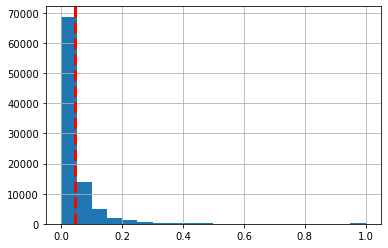

In [46]:
# lets look at the distribution of COMMONAREA_AVG
application.COMMONAREA_AVG.hist(bins=20)
plt.axvline(application.COMMONAREA_AVG.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the average

- COMMONAREA_AVG is concentrated around mean value. So NaN values will be filled up by mean values

In [47]:
# COMMONAREA_AVG
application.COMMONAREA_AVG = application.COMMONAREA_AVG.fillna(application.COMMONAREA_AVG.mean()).values

- MODE and MEDI values are expected to be highly correlated with AVG. So, the MODE and MEDI columns will be dropped keeping only the AVG column.

In [48]:
application.drop(columns=['COMMONAREA_MODE', 'COMMONAREA_MEDI'],inplace = True)


**NONLIVINGAPARTMENTS** Related Columns

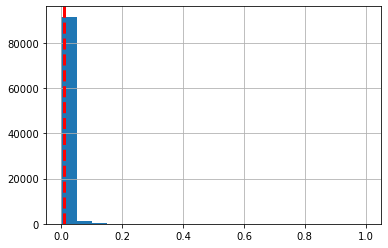

In [49]:
# lets look at the distribution of NONLIVINGAPARTMENTS_AVG
application.NONLIVINGAPARTMENTS_AVG.hist(bins=20)
plt.axvline(application.NONLIVINGAPARTMENTS_AVG.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the average

- NONLIVINGAPARTMENTS_AVG is concentrated around mean value. So it will be okay to fill NaN values by mean values

In [50]:
# NONLIVINGAPARTMENTS_AVG
application.NONLIVINGAPARTMENTS_AVG = application.NONLIVINGAPARTMENTS_AVG.fillna(application.NONLIVINGAPARTMENTS_AVG.mean()).values

In [51]:
# Dropping MEDI, MOD columns
application.drop(columns=['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI'],inplace = True)

**FONDKAPREMONT** Related Column

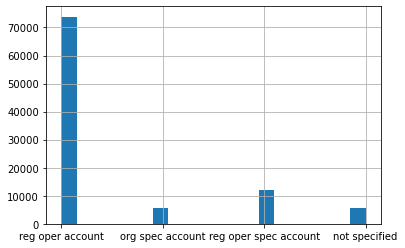

In [52]:
# lets look at the distribution of FONDKAPREMONT_MODE
application.FONDKAPREMONT_MODE.hist(bins=20)

- Four categories in the FONDKAPREMONT column. It would be reasonable to fill NaN by forward or barward fill method

In [53]:
application.FONDKAPREMONT_MODE = application.FONDKAPREMONT_MODE.fillna(method = 'ffill').values

**LIVINGAPARTMENTS** Related Column

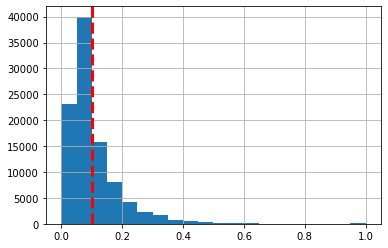

In [54]:
# lets look at the distribution of NONLIVINGAPARTMENTS_AVG
application.LIVINGAPARTMENTS_AVG.hist(bins=20)
plt.axvline(application.LIVINGAPARTMENTS_AVG.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the average

- The distribution is spread out around mean. We could fill NaN by assigning random numbers between let say 0 to 70 % values. However, the true values are not know so assigning random numbers may be wrong for even most of the numbers. Whereas assigning by a single number 'mean' value may not be correct for all of the numbers but a closer assumption as the population distribution is concentrated around mean.

In [55]:
application.LIVINGAPARTMENTS_AVG = application.LIVINGAPARTMENTS_AVG.fillna(application.LIVINGAPARTMENTS_AVG.mean()).values

In [56]:
# Dropping MEDI, MOD columns
application.drop(columns=['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI'],inplace = True)

**FLOORSMIN** Related Column

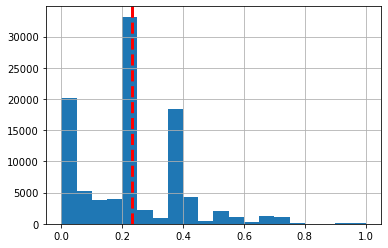

In [57]:
# lets look at the distribution of FLOORSMIN_AVG
application.FLOORSMIN_AVG.hist(bins=20)
plt.axvline(application.FLOORSMIN_AVG.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the average

- In the histogram, aparently 6 segments are visible. 
- It is highly likely that the categorical columns that has 6 groups could be well correlated with this variable
- Lets look into 'categorical' columns which has 6 types and explore if their distribution are distinct. 

In [58]:
# selecting 'categorical' datatypes
application_cat=application.select_dtypes(include=object)
application_cat.nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

- Two categorical columns have 6 groups. 'NAME_FAMILY_STATUS' and 'NAME_HOUSING_TYPE'. 
- 'NAME_FAMILY_STATUS' has better distinction hence it's mean values will be used to fill NaN for 'FLOORSMIN_AVG' column

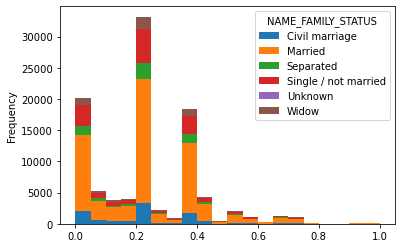

In [59]:
#.pivot(columns= 'NAME_FAMILY_STATUS')['FLOORSMIN_AVG'].plot(kind= 'hist', stacked=True, bins = 20)


In [60]:
# fill NaN of FLOORSMIN_AVG by the mean of NAME_FAMILY_STATUS columns catogories
application['FLOORSMIN_AVG'] = application.groupby('NAME_FAMILY_STATUS').transform(lambda x: x.fillna(x.mean()))

In [61]:
# Dropping MEDI, MOD columns
application.drop(columns=['FLOORSMIN_MODE', 'FLOORSMIN_MEDI'],inplace = True)

**YEARS_BUILD** Related Columns

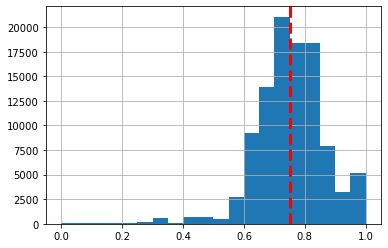

In [62]:
# lets look at the distribution of YEARS_BUILD_AVG
application.YEARS_BUILD_AVG.hist(bins=20)
plt.axvline(application.YEARS_BUILD_AVG.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the average

- Data distribution is clustered around a point. It will be reasonable to fill NaN by mean value

In [63]:
application.YEARS_BUILD_AVG = application.YEARS_BUILD_AVG.fillna(application.YEARS_BUILD_AVG.mean()).values

In [64]:
# Dropping MEDI, MOD columns
application.drop(columns=['YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI'],inplace = True)

**OWN_CAR_AGE** Column

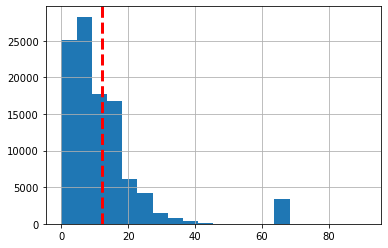

In [65]:
# lets look at the distribution of OWN_CAR_AGE 
application.OWN_CAR_AGE.hist(bins=20)
plt.axvline(application.OWN_CAR_AGE.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the average

- Two clusters are visible. One upto 40 year. Another one is around 65 years.
- Cluster around 65 seems like outliers as, it is less likely cars would age that much
- Mean value of the first cluster will be used to fill up NaN

In [66]:
application.OWN_CAR_AGE = application.OWN_CAR_AGE.fillna(application.OWN_CAR_AGE[application.OWN_CAR_AGE<=50].mean()).values

**LANDAREA** Related Columns

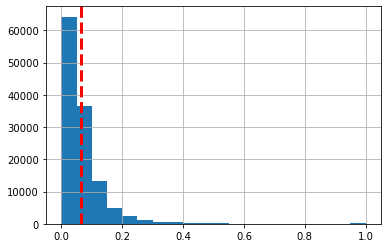

In [67]:
# lets look at the distribution of LANDAREA_AVG
application.LANDAREA_AVG.hist(bins=20)
plt.axvline(application.LANDAREA_AVG.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the average

- Visibly the data is centred around a single number. The mean value will be used as fill NaN values

In [68]:
application.LANDAREA_AVG = application.LANDAREA_AVG.fillna(application.LANDAREA_AVG.mean()).values

In [69]:
# Dropping MEDI, MOD columns
application.drop(columns=['LANDAREA_MODE', 'LANDAREA_MEDI'],inplace = True)

**BASEMENTAREA** Related Columns

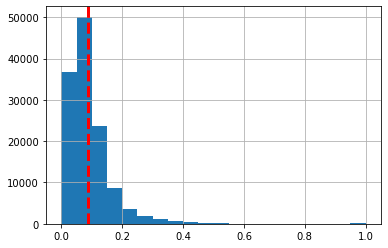

In [70]:
# lets look at the distribution of LANDAREA_AVG
application.BASEMENTAREA_AVG.hist(bins=20)
plt.axvline(application.BASEMENTAREA_AVG.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the average

- Visibly the data is centred around a single number. The mean value will be used as fill NaN values

In [71]:
application.BASEMENTAREA_AVG = application.BASEMENTAREA_AVG.fillna(application.BASEMENTAREA_AVG.mean()).values

In [72]:
# Dropping MEDI, MOD columns
application.drop(columns=['BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI'],inplace = True)

**EXT_SOURCE_1** Column

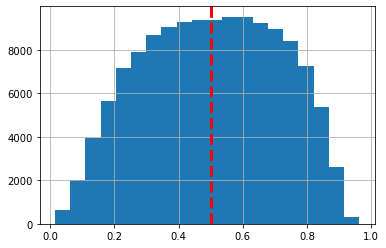

In [73]:
# lets look at the distribution of EXT_SOURCE_1
application.EXT_SOURCE_1.hist(bins=20)
plt.axvline(application.EXT_SOURCE_1.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the average

- The values are widely spreaded out around its mean. So it would not be wise to assign missing values with mean value. 
- We will take 50% data around the mean

In [74]:
# generate random numbers bound by 25% (low) and 75% (high) spread
low = application.EXT_SOURCE_1.describe()[4]
high = application.EXT_SOURCE_1.describe()[6]
n = application.EXT_SOURCE_1.isnull().sum()

In [75]:
# assign numbers within 50% spread around the mean to fill NaN
application.EXT_SOURCE_1[pd.isnull(application.EXT_SOURCE_1)] = np.random.uniform(low, high,n)

**EXT_SOURCE_2** Column

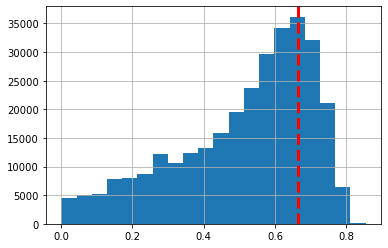

In [76]:
# lets look at the distribution of EXT_SOURCE_2
application.EXT_SOURCE_2.hist(bins=20)
plt.axvline(application.EXT_SOURCE_2.describe()[6], color='r', linestyle='dashed', linewidth=3) # red line is the 75% population line

- Data distribution peaked across 50-75% population of the data
- Random numbers will be drawn between these numbes and assigned for missing values

In [77]:
# generate random numbers bound by 50% (low) and 75% (high) spread
low = application.EXT_SOURCE_2.describe()[5]
high = application.EXT_SOURCE_2.describe()[6]
n = application.EXT_SOURCE_2.isnull().sum()

In [78]:
# assign numbers within 50-75% spread around the mean to fill NaN
application.EXT_SOURCE_2[pd.isnull(application.EXT_SOURCE_2)] = np.random.uniform(low, high,n)

**EXT_SOURCE_3** Column

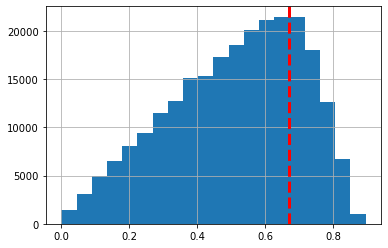

In [79]:
# lets look at the distribution of EXT_SOURCE_3
application.EXT_SOURCE_3.hist(bins=20)
plt.axvline(application.EXT_SOURCE_3.describe()[6], color='r', linestyle='dashed', linewidth=3) # red line is the 75% population line

- Data distribution peaked across 50-75% population of the data
- Random numbers will be drawn between these numbes and assigned for missing values

In [80]:
# generate random numbers bound by 50% (low) and 75% (high) spread
low = application.EXT_SOURCE_3.describe()[5]
high = application.EXT_SOURCE_3.describe()[6]
n = application.EXT_SOURCE_3.isnull().sum()

In [81]:
# assign numbers within 50-75% spread around the mean to fill NaN
application.EXT_SOURCE_3[pd.isnull(application.EXT_SOURCE_3)] = np.random.uniform(low, high,n)

**NONLIVINGAREA** Related Columns

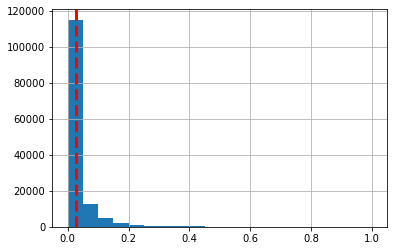

In [82]:
# lets look at the distribution of NONLIVINGAREA_AVG
application.NONLIVINGAREA_AVG.hist(bins=20)
plt.axvline(application.NONLIVINGAREA_AVG.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the average

- Visibly the data is centred around a single number. The mean value will be used as fill NaN values

In [83]:
application.NONLIVINGAREA_AVG = application.NONLIVINGAREA_AVG.fillna(application.NONLIVINGAREA_AVG.mean()).values

In [84]:
# Dropping MEDI, MOD columns
application.drop(columns=['NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],inplace = True)

**ELEVATORS** Related Columns

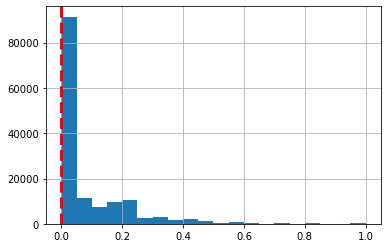

In [85]:
# lets look at the distribution of ELEVATORS_AVG
application.ELEVATORS_AVG.hist(bins=20)
plt.axvline(application.ELEVATORS_AVG.describe()[4], color='r', linestyle='dashed', linewidth=3) # red line is the 25% population line

- Visibly the data is centred around 25% population spread. This will be used as fill NaN values

In [86]:
application.ELEVATORS_AVG = application.ELEVATORS_AVG.fillna(application.ELEVATORS_AVG.describe()[4]).values

In [87]:
# Dropping MEDI, MOD columns
application.drop(columns=['ELEVATORS_MODE', 'ELEVATORS_MEDI'],inplace = True)

**WALLSMATERIAL** Column

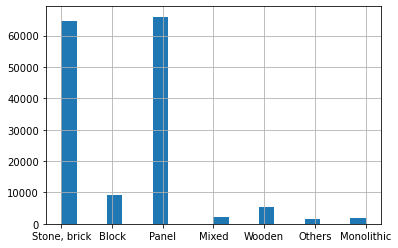

In [88]:
# lets look at the distribution of WALLSMATERIAL_MODE
application.WALLSMATERIAL_MODE.hist(bins=20)

- 6 categories in the WALLSMATERIAL column. Categorical variables with 6 sub group was explored, but none of the distribution looked similar with WALLSMATERIAL. It would be reasonable to fill NaN by forward or backward fill method, as majority will be filled by 'panel' and 'Stone, brick' population.

In [89]:
application.WALLSMATERIAL_MODE = application.WALLSMATERIAL_MODE.fillna(method = 'ffill').values

**APARTMENTS** Related Columns

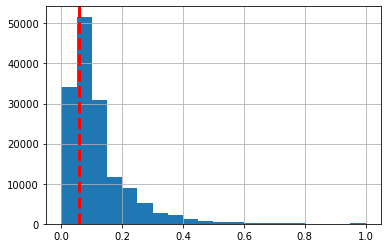

In [90]:
# lets look at the distribution of APARTMENTS_AVG
application.APARTMENTS_AVG.hist(bins=20)
plt.axvline(application.APARTMENTS_AVG.describe()[4], color='r', linestyle='dashed', linewidth=3) # red line is the 25% population line

- Visibly the data is centred around 25% population spread. This will be used as fill NaN values

In [91]:
application.APARTMENTS_AVG = application.APARTMENTS_AVG.fillna(application.APARTMENTS_AVG.describe()[4]).values

In [92]:
# Dropping MEDI, MOD columns
application.drop(columns=['APARTMENTS_MODE', 'APARTMENTS_MEDI'],inplace = True)

**ENTRANCES** Related Columns

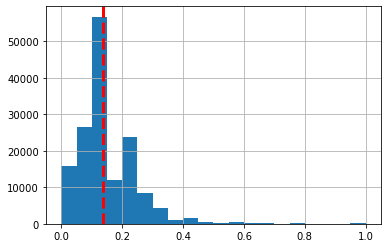

In [93]:
# lets look at the distribution of ENTRANCES_AVG
application.ENTRANCES_AVG.hist(bins=20)
plt.axvline(application.ENTRANCES_AVG.median(), color='r', linestyle='dashed', linewidth=3) # red line is the median line

- The data forms a single cluster. Majority centres around 'median line' of the population. We will use this value to fill NaN

In [94]:
application.ENTRANCES_AVG = application.ENTRANCES_AVG.fillna(application.ENTRANCES_AVG.median()).values

In [95]:
# Dropping MEDI, MOD columns
application.drop(columns=['ENTRANCES_MODE', 'ENTRANCES_MEDI'],inplace = True)

**LIVINGAREA** Related Columns

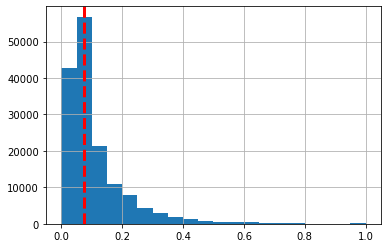

In [96]:
# lets look at the distribution of LIVINGAREA_AVG
application.LIVINGAREA_AVG.hist(bins=20)
plt.axvline(application.LIVINGAREA_AVG.median(), color='r', linestyle='dashed', linewidth=3) # red line is the median line

- The data forms a single cluster. Majority centres around 'median line' of the population. We will use this value to fill NaN

In [97]:
application.LIVINGAREA_AVG = application.LIVINGAREA_AVG.fillna(application.LIVINGAREA_AVG.median()).values

In [98]:
# Dropping MEDI, MOD columns
application.drop(columns=['LIVINGAREA_MODE', 'LIVINGAREA_MEDI'],inplace = True)

**HOUSETYPE** Column

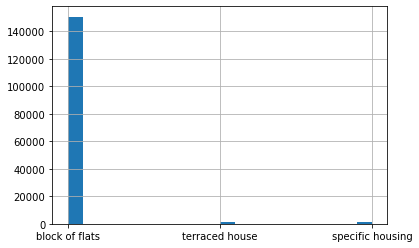

In [99]:
# lets look at the distribution of HOUSETYPE_MODE
application.HOUSETYPE_MODE.hist(bins=20)

- 3 categories in the HOUSETYPE column. It would be reasonable to fill NaN by forward or backward fill method, as majority will be filled by 'block of flats' sub-category.

In [100]:
application.HOUSETYPE_MODE = application.HOUSETYPE_MODE.fillna(method = 'ffill').values

**FLOORSMAX** Column

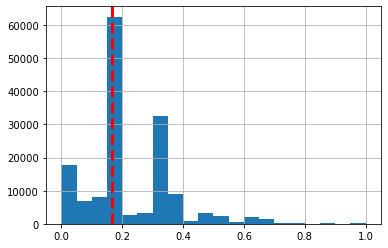

In [101]:
# lets look at the distribution of FLOORSMAX_AVG
application.FLOORSMAX_AVG.hist(bins=20)
plt.axvline(application.FLOORSMAX_AVG.median(), color='r', linestyle='dashed', linewidth=3) # red line is the median line

- Following the suit of FLOORSMIN, we will use NAME_FAMILY_STATUS to fill the missing valus in FLOORSMAX

In [102]:
# fill NaN of FLOORSMAX_AVG by the mean of NAME_FAMILY_STATUS columns catogories
application['FLOORSMAX_AVG'] = application.groupby('NAME_FAMILY_STATUS').transform(lambda x: x.fillna(x.mean()))

In [103]:
# Dropping MEDI, MOD columns
application.drop(columns=['FLOORSMAX_MODE', 'FLOORSMAX_MEDI'],inplace = True)

**YEARS_BEGINEXPLUATATION** Related Columns

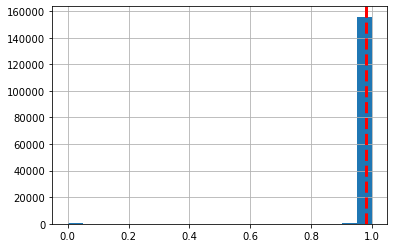

In [104]:
# lets look at the distribution of YEARS_BEGINEXPLUATATION_AVG
application.YEARS_BEGINEXPLUATATION_AVG.hist(bins=20)
plt.axvline(application.YEARS_BEGINEXPLUATATION_AVG.median(), color='r', linestyle='dashed', linewidth=3) # red line is the median line

- Data is highly concentrated around the median value. We will use this value to fill NaN

In [105]:
application.YEARS_BEGINEXPLUATATION_AVG = application.YEARS_BEGINEXPLUATATION_AVG.fillna(application.YEARS_BEGINEXPLUATATION_AVG.median()).values

In [106]:
# Dropping MEDI, MOD columns
application.drop(columns=['YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI'],inplace = True)

**TOTALAREA** Column

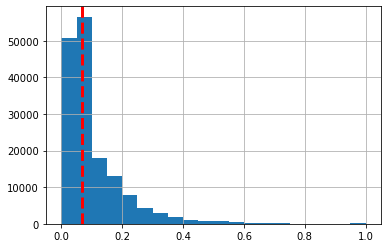

In [107]:
# lets look at the distribution of TOTALAREA_MODE
application.TOTALAREA_MODE.hist(bins=20)
plt.axvline(application.TOTALAREA_MODE.median(), color='r', linestyle='dashed', linewidth=3) # red line is the median line

- Data is highly concentrated around the median value. We will use this value to fill NaN

In [108]:
application.TOTALAREA_MODE = application.TOTALAREA_MODE.fillna(application.TOTALAREA_MODE.median()).values

**EMERGENCYSTATE** Column

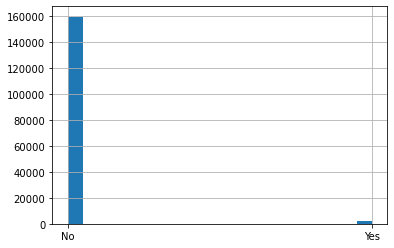

In [109]:
# lets look at the distribution of EMERGENCYSTATE_MODE
application.EMERGENCYSTATE_MODE.hist(bins=20)

- Highly imbalanced distribution between two sub-categories. We will assign NaN values with forward or backward fill

In [110]:
application.EMERGENCYSTATE_MODE = application.EMERGENCYSTATE_MODE.fillna(method = 'ffill').values

**OCCUPATION** Column

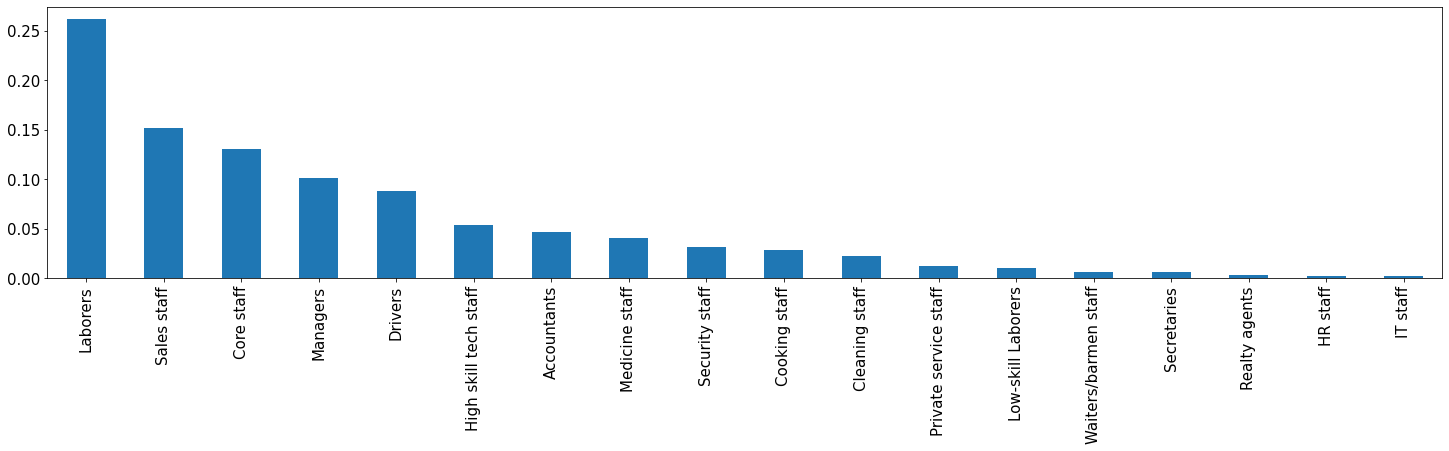

In [111]:
# lets look at the distribution of OCCUPATION_TYPE
application.OCCUPATION_TYPE.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar',figsize = (25,5), fontsize=15)

- Large number of sub-categories for OCCUPATION column. FIlling by forward/backward method will result in high errors. Rather we will assign missing values with the majority sub-class i.e. Laborers. There will be error still but in a small margin

In [112]:
application.OCCUPATION_TYPE = application.OCCUPATION_TYPE.fillna('Laborers')

**AMT_REQ_CREDIT_BUREAU** Related Columns

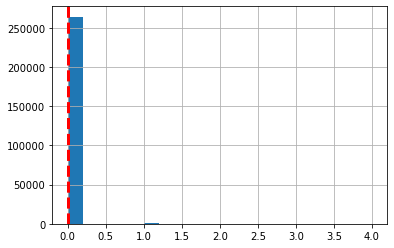

In [113]:
# lets look at the distribution of AMT_REQ_CREDIT_BUREAU_HOUR
application.AMT_REQ_CREDIT_BUREAU_HOUR.hist(bins=20)
plt.axvline(application.AMT_REQ_CREDIT_BUREAU_HOUR.median(), color='r', linestyle='dashed', linewidth=3) # red line is the median line

- Data is highly concentrated around the median value. We will use this value to fill NaN

In [114]:
application.AMT_REQ_CREDIT_BUREAU_HOUR = application.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(application.AMT_REQ_CREDIT_BUREAU_HOUR.median()).values

- Distribution of DAY, MON, WEEK, YEAR, QRT are very similar to AMT_REQ_CREDIT_BUREAU_HOUR columns
- Missing values will be filled by median values

In [115]:
application.AMT_REQ_CREDIT_BUREAU_DAY = application.AMT_REQ_CREDIT_BUREAU_DAY.fillna(application.AMT_REQ_CREDIT_BUREAU_DAY.median()).values
application.AMT_REQ_CREDIT_BUREAU_MON = application.AMT_REQ_CREDIT_BUREAU_MON.fillna(application.AMT_REQ_CREDIT_BUREAU_MON.median()).values
application.AMT_REQ_CREDIT_BUREAU_WEEK = application.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(application.AMT_REQ_CREDIT_BUREAU_WEEK.median()).values
application.AMT_REQ_CREDIT_BUREAU_YEAR = application.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(application.AMT_REQ_CREDIT_BUREAU_YEAR.median()).values
application.AMT_REQ_CREDIT_BUREAU_QRT = application.AMT_REQ_CREDIT_BUREAU_QRT.fillna(application.AMT_REQ_CREDIT_BUREAU_QRT.median()).values

**NAME_TYPE_SUITE** Column

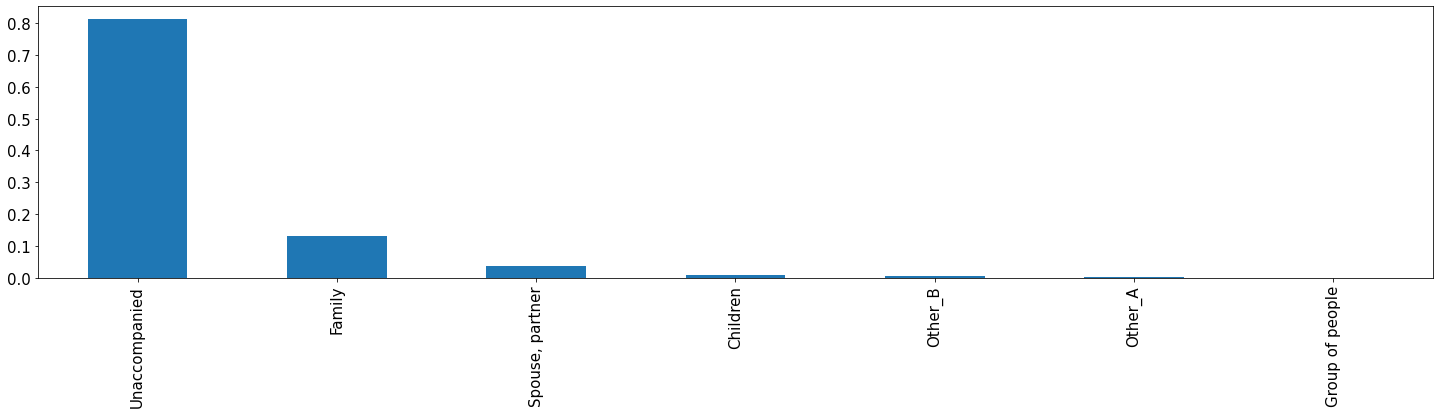

In [116]:
# lets look at the distribution of NAME_TYPE_SUITE
application.NAME_TYPE_SUITE.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar',figsize = (25,5), fontsize=15)

- Large number of sub-categories for OCCUPATION column. FIlling by forward/backward method will result in high errors. Rather we will assign missing values with the majority sub-class i.e. 'Unaccompanied'. There will be error still but in a small margin

In [117]:
application.NAME_TYPE_SUITE = application.NAME_TYPE_SUITE.fillna('Unaccompanied')

**CNT_SOCIAL_CIRCLE** Related Columns

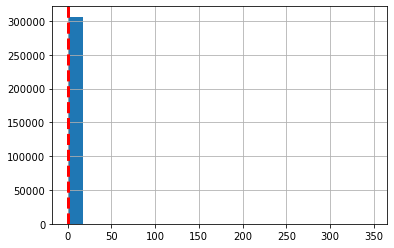

In [118]:
# lets look at the distribution of OBS_30_CNT_SOCIAL_CIRCLE
application.OBS_30_CNT_SOCIAL_CIRCLE.hist(bins=20)
plt.axvline(application.OBS_30_CNT_SOCIAL_CIRCLE.median(), color='r', linestyle='dashed', linewidth=3) # red line is the median line

- Data is highly concentrated around the median value. We will use this value to fill NaN

In [119]:
application.OBS_30_CNT_SOCIAL_CIRCLE = application.OBS_30_CNT_SOCIAL_CIRCLE.fillna(application.OBS_30_CNT_SOCIAL_CIRCLE.median()).values

- Distribution of OBS_60, DEF_30, DEF_60 are very similar to OBS_30_CNT_SOCIAL_CIRCLE column
- Missing values will be filled by median values

In [120]:
application.OBS_60_CNT_SOCIAL_CIRCLE = application.OBS_60_CNT_SOCIAL_CIRCLE.fillna(application.OBS_60_CNT_SOCIAL_CIRCLE.median()).values
application.DEF_30_CNT_SOCIAL_CIRCLE = application.DEF_30_CNT_SOCIAL_CIRCLE.fillna(application.DEF_30_CNT_SOCIAL_CIRCLE.median()).values
application.DEF_60_CNT_SOCIAL_CIRCLE = application.DEF_60_CNT_SOCIAL_CIRCLE.fillna(application.DEF_60_CNT_SOCIAL_CIRCLE.median()).values

**AMT_GOODS_PRICE** Column

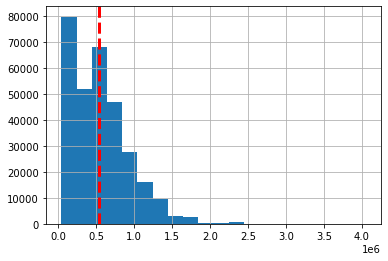

In [121]:
# lets look at the distribution of AMT_GOODS_PRICE
application.AMT_GOODS_PRICE.hist(bins=20)
plt.axvline(application.AMT_GOODS_PRICE.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the mean line

- Very little amount of data for this column has missing value (<0.5%). We will replace missing values with the mean of the column

In [122]:
application.AMT_GOODS_PRICE = application.AMT_GOODS_PRICE.fillna(application.AMT_GOODS_PRICE.mean()).values

**AMT_ANNUITY** Column

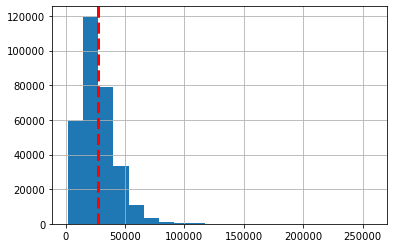

In [123]:
# lets look at the distribution of AMT_ANNUITY
application.AMT_ANNUITY.hist(bins=20)
plt.axvline(application.AMT_ANNUITY.mean(), color='r', linestyle='dashed', linewidth=3) # red line is the median line

- Very little amount of data for this column has missing value (<0.5%). We will replace missing values with the mean of the column

In [124]:
application.AMT_ANNUITY = application.AMT_ANNUITY.fillna(application.AMT_ANNUITY.mean()).values

**CNT_FAM_MEMBERS** Column

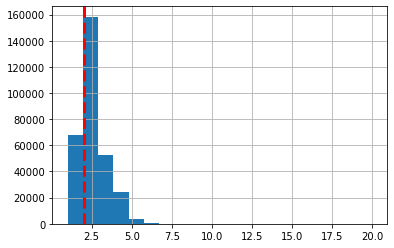

In [125]:
# lets look at the distribution of CNT_FAM_MEMBERS
application.CNT_FAM_MEMBERS.hist(bins=20)
plt.axvline(application.CNT_FAM_MEMBERS.median(), color='r', linestyle='dashed', linewidth=3) # red line is the median line

- Very little amount of data for this column has missing value (<0.5%). We will replace missing values with the median of the column as the parameter should be a integer.

In [126]:
application.CNT_FAM_MEMBERS = application.CNT_FAM_MEMBERS.fillna(application.CNT_FAM_MEMBERS.median()).values

**DAYS_LAST_PHONE_CHANGE** Column

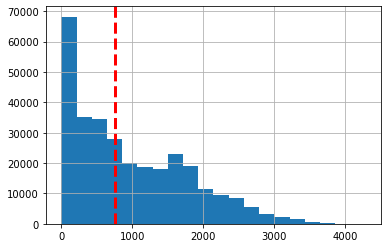

In [127]:
# lets look at the distribution of DAYS_LAST_PHONE_CHANGE
application.DAYS_LAST_PHONE_CHANGE = -1*application.DAYS_LAST_PHONE_CHANGE   # changing to positive days
application.DAYS_LAST_PHONE_CHANGE.hist(bins=20)
plt.axvline(application.DAYS_LAST_PHONE_CHANGE.median(), color='r', linestyle='dashed', linewidth=3) # red line is the median line

- Majority numbers are 0 which means not known or did not change the phone
- Missing values will be placed with 0

In [128]:
application.DAYS_LAST_PHONE_CHANGE = application.DAYS_LAST_PHONE_CHANGE.fillna(0)

#### Check for Missing Values Again

In [129]:
# check for missing data
nas=pd.DataFrame(100*(application.isnull().sum().sort_values(ascending=False)/len(application)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


- All missing data have been filled

## Look for Duplicate Rows

In [130]:
# application

duplicateRowsDF = application[application.duplicated()]
print('duplicte rows in application dataframe is:',format(len(duplicateRowsDF)))


duplicte rows in application dataframe is: 0


No duplicate rows were found

# Save cleaned CSV files

In [131]:
application.to_csv('data/application_wrangled.csv')

# 2. Exploratory Data Analysis (EDA)

### Load the data from the csv file

In [132]:
df=pd.read_csv('data/application_wrangled.csv',index_col=0)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- Large number of column variables is present (94). It is hard to look all of them at a time. EDA will be applied part by part

**<font color='teal'> Summary stats table transposed to fit on the screen.</font>**

In [142]:
# first half of the numerical variables
df.describe().T.head(39)

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.573909,14493.454517,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538396.207429,369279.426396,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [143]:
# second half of the numerical variables
df.describe().T.tail(39)

,count,mean,std,min,25%,50%,75%,max
FLOORSMAX_AVG,307511.0,278180.518577,102790.175348,100002.0,189145.500000,278202.000000,367142.500000,456255.0
FLOORSMIN_AVG,307511.0,278180.518577,102790.175348,100002.0,189145.500000,278202.000000,367142.500000,456255.0
LANDAREA_AVG,307511.0,0.066333,0.051743,0.0,0.062900,0.066333,0.066333,1.0
LIVINGAPARTMENTS_AVG,307511.0,0.100775,0.052078,0.0,0.100775,0.100775,0.100775,1.0
LIVINGAREA_AVG,307511.0,0.090886,0.079745,0.0,0.074500,0.074500,0.074500,1.0
NONLIVINGAPARTMENTS_AVG,307511.0,0.008809,0.026390,0.0,0.007700,0.008809,0.008809,1.0
NONLIVINGAREA_AVG,307511.0,0.028358,0.046545,0.0,0.006100,0.028358,0.028358,1.0
TOTALAREA_MODE,307511.0,0.086258,0.079110,0.0,0.067000,0.068800,0.070300,1.0
OBS_30_CNT_SOCIAL_CIRCLE,307511.0,1.417523,2.398395,0.0,0.000000,0.000000,2.000000,348.0
DEF_30_CNT_SOCIAL_CIRCLE,307511.0,0.142944,0.446033,0.0,0.000000,0.000000,0.000000,34.0


- Again. Large number of variables to look at all together. They will be explored case by case 

## 2.1 Target Variable Distribution
### What Percentage of the Population Likely to Repay the Loan?

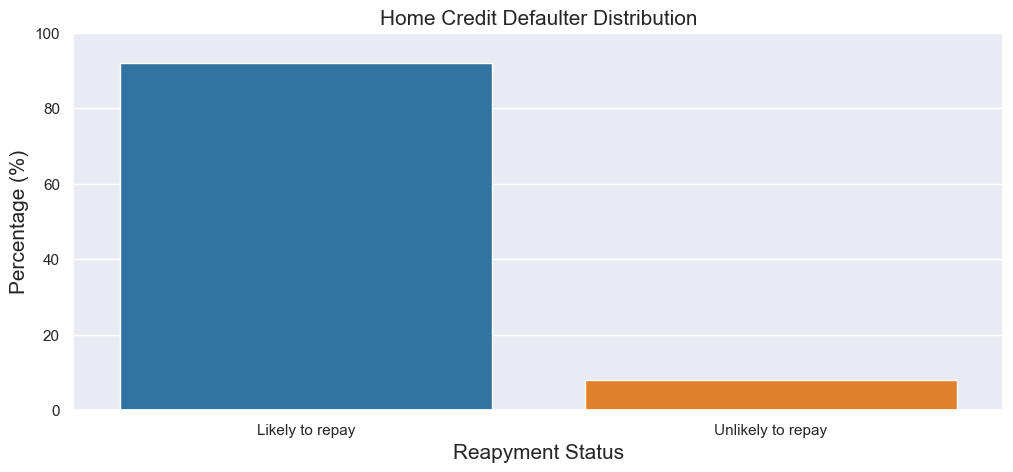

In [436]:
# Make a dataframe with, percentage of Likely to repay (TARGET=0) vs unlikely to repay (TARGET=1)

data = [['Likely to repay', 100*(sum(df.TARGET==0)/len(df.TARGET))], ['Unlikely to repay', 100*(sum(df.TARGET==1)/len(df.TARGET))]] 
target_percentage = pd.DataFrame(data, columns = ['Target', 'Percentage']) 


# plot distribution of repay vs not likely to repay

plt.figure(figsize=(12,5), dpi=100)
sns.set(style = "darkgrid")

ax = sns.barplot(
    y=target_percentage.Percentage.values,
    x=target_percentage.Target.values,
    data=target_percentage,  
    palette='tab10')

ax.set(ylim=(0,100))

ax.set_ylabel("Percentage (%)", fontsize=15)
ax.set_xlabel("Reapyment Status", fontsize=15)
plt.title("Home Credit Defaulter Distribution", fontsize=15)
plt.savefig("figures/EDA_target_distribution.png")
plt.show()

- Among the population in hand, 8 % are unlikely to repay the loan whereas large percentage (~92%) are predicted to repay the loan
- The data is highly imbalanced 

## 2.1 Insights into Categorical data

In [717]:
# selecting 'categorical' datatypes

df_cat = df.select_dtypes(include=['object'])

# add 'target' variable with 'categorical' data that will be used to plot variables target variable wise

target = df.TARGET.values
df_cat['TARGET'] = target
df_cat.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,1
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,reg oper account,block of flats,Block,No,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Block,No,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,reg oper account,block of flats,Block,No,0


### What Contract Type Mostly to Repay Loan?

- Two types. Cash and revolving loans
- Cash loans need to be repayed within a fixed term whereas the length of revolving  is on-going 

- Lets start with NAME_CONTRACT_TYPE column

In [718]:
def target_wise_data_dist(df, column_name):
    # group by category
    temp_df1_1 = df_cat.groupby([column_name,'TARGET']).TARGET.count().to_frame()
    temp_df1_1.rename(columns = {'TARGET':'Total'}, inplace=True)
    temp_df1_1.reset_index(inplace=True)
    
    # total numbers by category
    temp_df2_1 = temp_df1_1.groupby(column_name).Total.sum().to_frame().reset_index()
    temp_df2_1.rename(columns = {'Total':'Total_by_cat'},inplace=True)
    
    # percentage by category
    temp_df2_1['Percentage_total'] = 100*(temp_df2_1['Total_by_cat']/temp_df2_1.Total_by_cat.sum())
    temp_df2_1.drop(columns={'Total_by_cat'},inplace=True)
    
    # group by target
    temp_df1_2 = df_cat.groupby(['TARGET',column_name]).TARGET.count().to_frame()
    temp_df1_2.rename(columns = {'TARGET':'Total'}, inplace=True)
    temp_df1_2.reset_index(inplace=True)
    
    # total numbers by target
    temp_df2_2 = temp_df1_2.groupby('TARGET').Total.sum().to_frame().reset_index()
    temp_df2_2.rename(columns = {'Total':'Total_by_target'},inplace=True)
    temp_df2_2 = pd.merge(temp_df1_2, temp_df2_2, how='left', on = ['TARGET'])
    
    # percentage by target
    temp_df2_2['Percentage'] = 100*(temp_df2_2['Total']/temp_df2_2.Total_by_target)
    temp_df2_2.drop(columns={'Total','Total_by_target'},inplace=True)
    
    # merge category and target together
    temp = pd.merge(temp_df2_2,temp_df2_1,how='left',on=[column_name])
    return temp

In [719]:
def target_wise_data_plot(df, column_name, fig_name):
    
    '''function to plot data distribution for the column variable grouped by target varieble'''
    
    # make 2 subplots
    fig, axes =plt.subplots(nrows=2, ncols=1, figsize=(8,8), dpi=100)
    plt.subplots_adjust(hspace = 0.7)
    
    # plot data distribution by column variable
    a = sns.barplot(
    y=df[[column_name,'Percentage_total']].drop_duplicates()['Percentage_total'],
    x=df[[column_name,'Percentage_total']].drop_duplicates()[column_name],
    data=df[[column_name,'Percentage_total']].drop_duplicates(),  
    palette='tab10', ax=axes[0])
    
    a.set(ylim=(0,100))
    a.set_title('By '+' '.join(map(str, fig_name.split('_')))+' distribution')
    a.set_xlabel("", fontsize=15)
    a.set_ylabel("Percentage (%)", fontsize=15)
    a.set_xticklabels(a.get_xticklabels(), rotation=45)
    
    # plot data distribution by column variable and target variable
    b = sns.barplot(
    y=df['Percentage'],
    hue=df[column_name],
    x=df['TARGET'],
    data=df,  
    palette='tab10', ax=axes[1])
    plt.legend(loc=0)
    
    h, l = b.get_legend_handles_labels()
    b.legend(h,df[column_name].drop_duplicates(), title=" ")
    
    b.set(ylim=(0,100))
    b.set_xlabel("", fontsize=15)
    b.set_ylabel("Percentage (%)", fontsize=15)
    b.set_title('By '+' '.join(map(str, fig_name.split('_')))+' distribution by target variable')
    b.set_xticklabels(['Likely to repay','Not likely to repay'])
    plt.savefig('figures/EDA_'+fig_name+'weekofmonth.png')
    plt.show()
    return

In [720]:
column_name = 'NAME_CONTRACT_TYPE'

In [721]:
# dataframe containing percent distribution information
loan_type = target_wise_data_dist(df_cat, column_name)
loan_type.sort_values(by=['Percentage'],ascending=False, inplace=True)
loan_type.head()

,TARGET,NAME_CONTRACT_TYPE,Percentage,Percentage_total
2,1,Cash loans,93.538771,90.478715
0,0,Cash loans,90.209986,90.478715
1,0,Revolving loans,9.790014,9.521285
3,1,Revolving loans,6.461229,9.521285


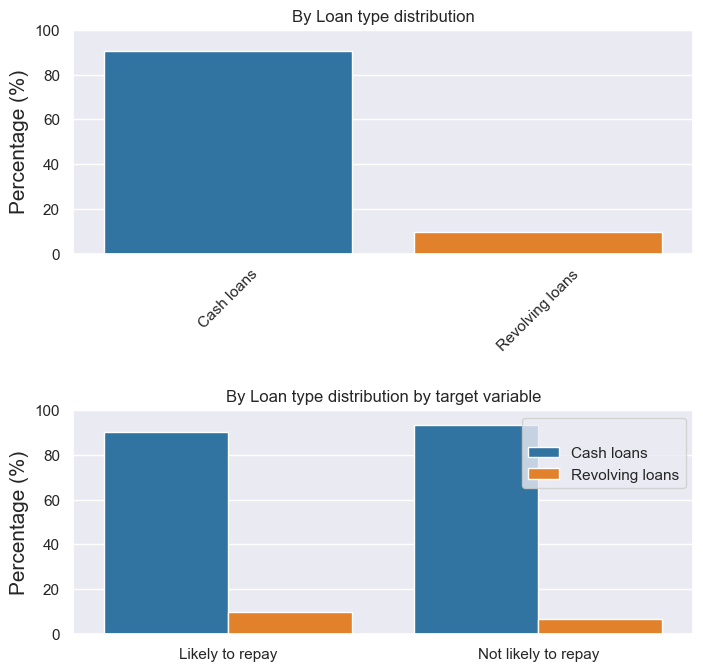

In [722]:
# plot target variable wise distribution for 'loan_type'
target_wise_data_plot(loan_type, column_name, 'Loan_type')

- Most disbersed loans are 'cash loan' type that is with fixed repayment time
- For both loan defaulter and not defaulter, cash loans are dominant

### Which Gender Group is Likely to Repay Loan?

- Male, Female and Unknown

In [745]:
column_name = 'CODE_GENDER'

In [746]:
# dataframe containing percent distribution information
gender = target_wise_data_dist(df_cat, column_name)
gender.sort_values(by=['Percentage'],ascending=False, inplace=True)
gender.head()

,TARGET,CODE_GENDER,Percentage,Percentage_total
0,0,F,66.603228,65.834393
3,1,F,57.079557,65.834393
4,1,M,42.920443,34.164306
1,0,M,33.395357,34.164306
2,0,XNA,0.001415,0.001301


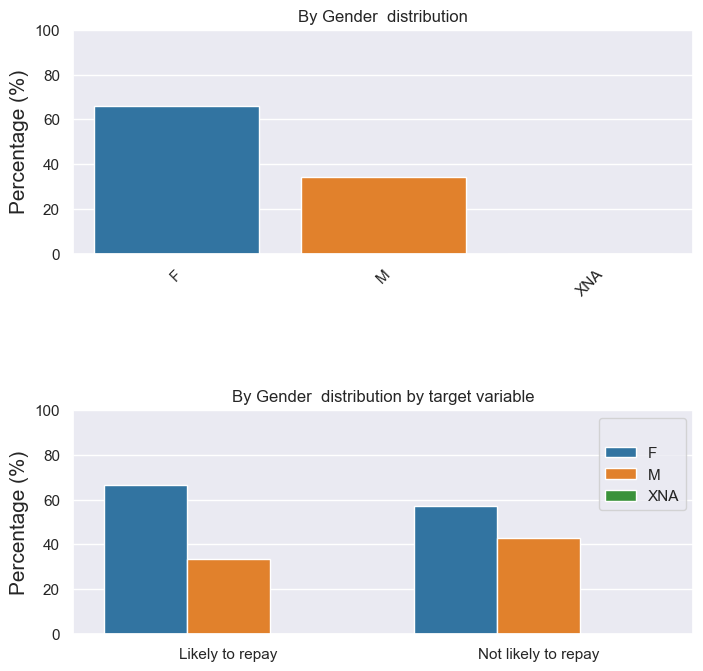

In [747]:
# plot target variable wise distribution
target_wise_data_plot(gender, column_name, 'Gender_')

- Most loans were ditributed to the women
- Male population increased in Deafulter list compared to non-defaulter list

### How Many of the Loaners Own Cars?


In [629]:
column_name = 'FLAG_OWN_CAR'

In [630]:
# dataframe containing percent distribution information
cars = target_wise_data_dist(df_cat, column_name)
cars.sort_values(by=['Percentage'],ascending=False, inplace=True)
cars.head()

,TARGET,FLAG_OWN_CAR,Percentage,Percentage_total
0,0,N,65.682418,65.989184
1,0,Y,34.317582,34.010816
2,1,N,69.482377,65.989184
3,1,Y,30.517623,34.010816


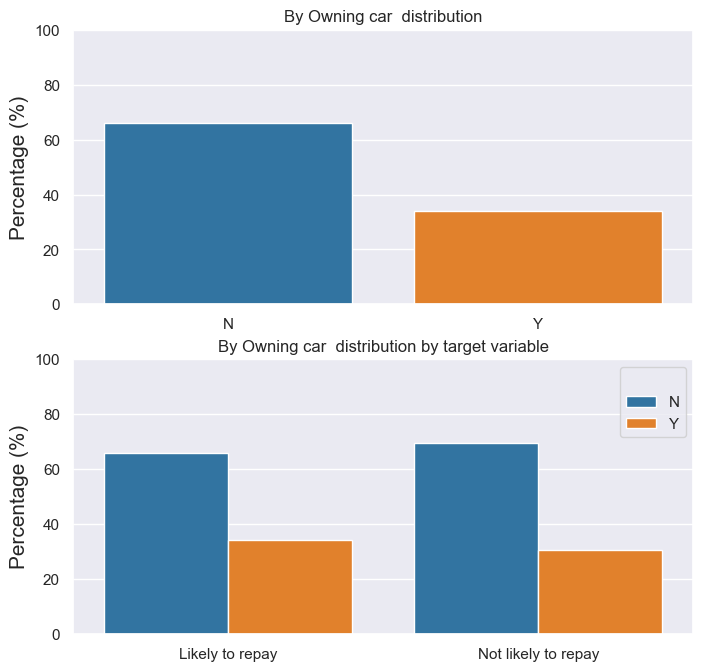

In [631]:
# plot target variable wise distribution
target_wise_data_plot(cars, column_name, 'Owning_car_')

- Most clients do not own a car
- In the defaulter list, number for not owning a car is even higher

### How Many Own Realty?

In [726]:
column_name = 'FLAG_OWN_REALTY'

In [727]:
# dataframe containing percent distribution information
realty = target_wise_data_dist(df_cat, column_name)
realty.sort_values(by=['Percentage'],ascending=False, inplace=True)
realty.head()

,TARGET,FLAG_OWN_REALTY,Percentage,Percentage_total
1,0,Y,69.451264,69.367275
3,1,Y,68.410876,69.367275
2,1,N,31.589124,30.632725
0,0,N,30.548736,30.632725


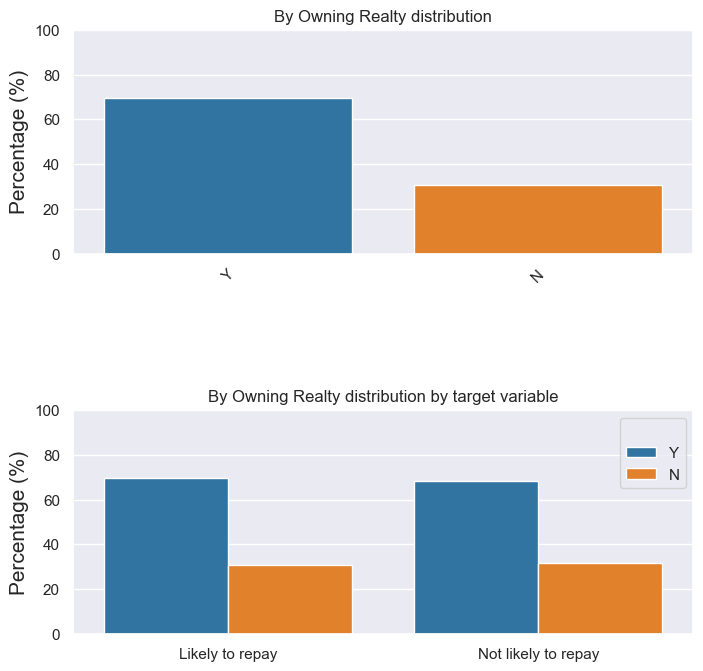

In [728]:
# plot target variable wise distribution
target_wise_data_plot(realty, column_name, 'Owning_Realty')

- Most clients own realty although they do not own cars
- Similar population distribution for defaulter/non defaulter classes

### Who Accompanied the Clients during previous Applications?

In [729]:
column_name ='NAME_TYPE_SUITE'

In [730]:
# dataframe containing percent distribution information
suite = target_wise_data_dist1(df_cat, column_name)
suite.sort_values(by=['Percentage'],ascending=False, inplace=True)
suite.head()

,TARGET,NAME_TYPE_SUITE,Percentage,Percentage_total
13,1,Unaccompanied,82.203424,81.238720
6,0,Unaccompanied,81.154001,81.238720
1,0,Family,13.138252,13.056118
8,1,Family,12.120846,13.056118
5,0,"Spouse, partner",3.705525,3.697429


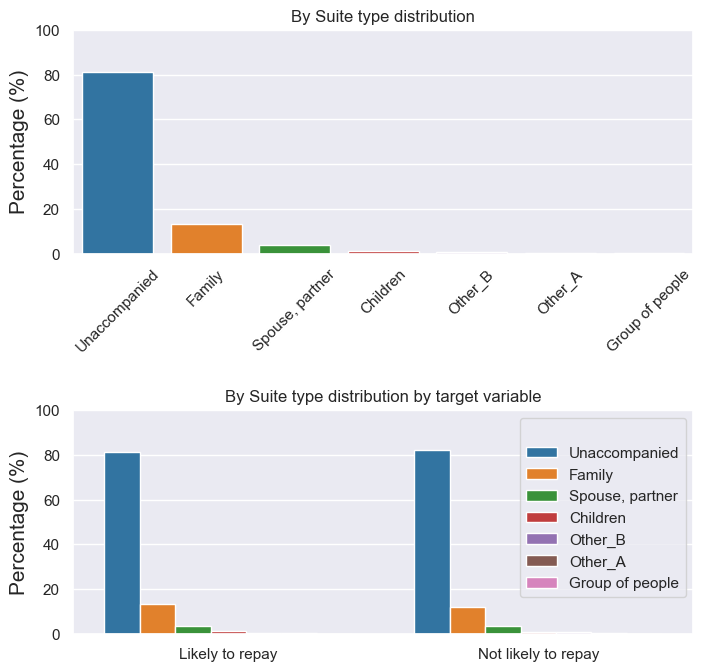

In [731]:
# plot target variable wise distribution
target_wise_data_plot(suite, column_name, 'Suite_type')

- Majority clients came 'unaccompanied' during the application

### Income Types

In [732]:
column_name ='NAME_INCOME_TYPE'

In [733]:
# dataframe containing percent distribution information
income = target_wise_data_dist1(df_cat, column_name)
income.sort_values(by=['Percentage'],ascending=False, inplace=True)
income.head()

,TARGET,NAME_INCOME_TYPE,Percentage,Percentage_total
13,1,Working,61.325277,51.631974
7,0,Working,50.780725,51.631974
1,0,Commercial associate,23.438373,23.289248
8,1,Commercial associate,21.591138,23.289248
3,0,Pensioner,18.529393,18.003258


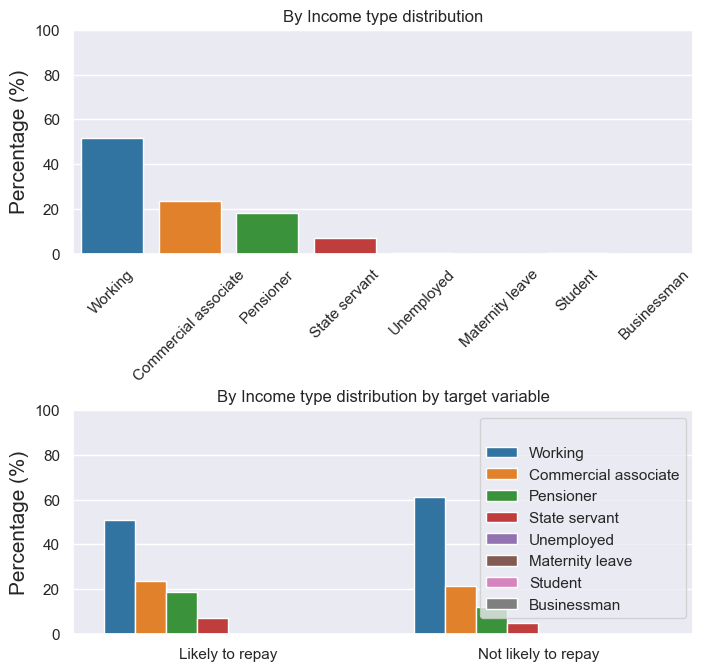

In [734]:
# plot target variable wise distribution
target_wise_data_plot(income, column_name, 'Income_type')

- Most clients are from 'working class'
- This number slightly increased for loan defaulter class

### What Educational Background the Clients Come From?

In [735]:
column_name ='NAME_EDUCATION_TYPE'

In [736]:
# dataframe containing percent distribution information
education = target_wise_data_dist1(df_cat, column_name)
education.sort_values(by=['Percentage'],ascending=False, inplace=True)
education.head()

,TARGET,NAME_EDUCATION_TYPE,Percentage,Percentage_total
9,1,Secondary / secondary special,78.646526,71.018923
4,0,Secondary / secondary special,70.349080,71.018923
1,0,Higher education,25.064559,24.344820
6,1,Higher education,16.149043,24.344820
7,1,Incomplete higher,3.512588,3.341994


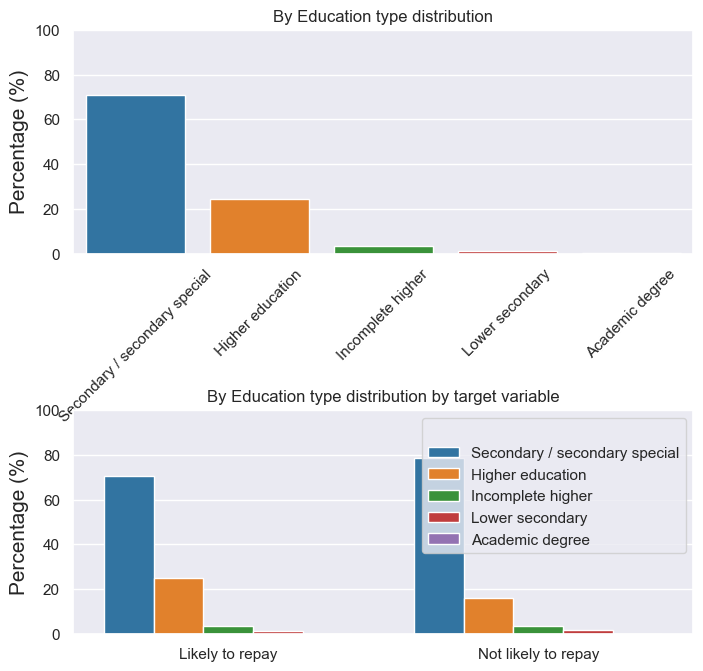

In [737]:
# plot target variable wise distribution
target_wise_data_plot(education, column_name, 'Education_type')

- Most clients have 'secondary' education
- This number increased for loan defaulter class

### What are Client's Marital Status?

In [738]:
column_name ='NAME_FAMILY_STATUS'

In [739]:
# dataframe containing percent distribution information
maritalstatus = target_wise_data_dist1(df_cat, column_name)
maritalstatus.sort_values(by=['Percentage'],ascending=False, inplace=True)
maritalstatus.head()

,TARGET,NAME_FAMILY_STATUS,Percentage,Percentage_total
1,0,Married,64.234522,63.878040
7,1,Married,59.818731,63.878040
9,1,Single / not married,17.953676,14.778008
3,0,Single / not married,14.499126,14.778008
6,1,Civil marriage,11.927492,9.682580


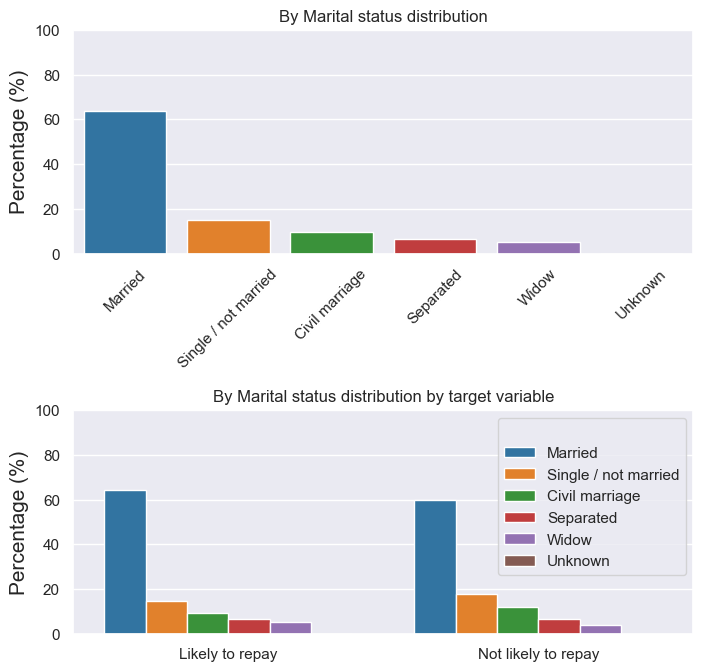

In [740]:
# plot target variable wise distribution
target_wise_data_plot(maritalstatus, column_name, 'Marital_status')

- 'Married' people applied for maximum loans
- In the deafulter class, 'single' people segment increased than non-defaulter class 

### What House Types they belong?

In [748]:
column_name ='NAME_HOUSING_TYPE'

In [749]:
# dataframe containing percent distribution information
house = target_wise_data_dist1(df_cat, column_name)
house.sort_values(by=['Percentage'],ascending=False, inplace=True)
house.head()

,TARGET,NAME_HOUSING_TYPE,Percentage,Percentage_total
1,0,House / apartment,89.001931,88.734387
7,1,House / apartment,85.687815,88.734387
11,1,With parents,6.992951,4.825844
5,0,With parents,4.635532,4.825844
8,1,Municipal apartment,3.846928,3.636618


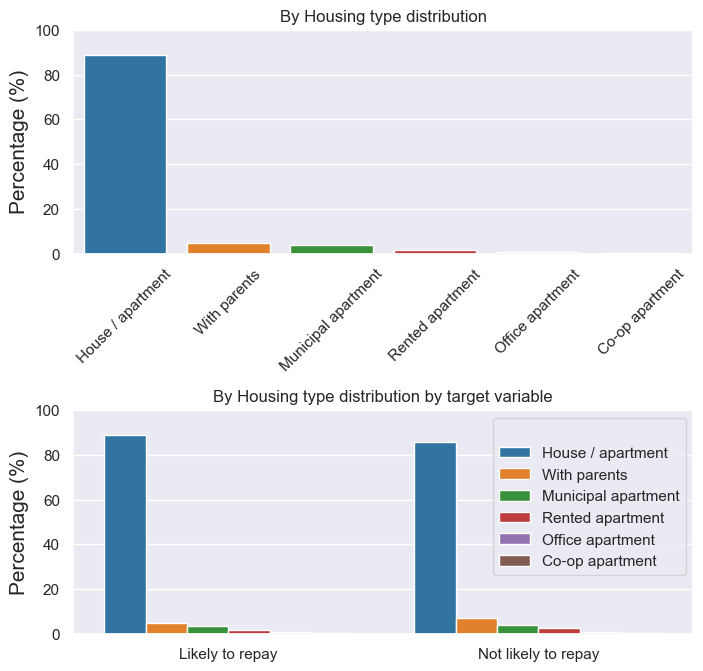

In [750]:
# plot target variable wise distribution
target_wise_data_plot(house, column_name, 'Housing_type')

- 'House' dwellers are the significant number for total loan applications

### Occupation Types

In [751]:
column_name = 'OCCUPATION_TYPE'

In [752]:
# dataframe containing percent distribution information
occupation = target_wise_data_dist1(df_cat, column_name)
occupation.sort_values(by=['Percentage'],ascending=False, inplace=True)
occupation.head()

,TARGET,OCCUPATION_TYPE,Percentage,Percentage_total
8,0,Laborers,49.334244,49.291570
26,1,Laborers,48.805639,49.291570
32,1,Sales staff,12.455186,10.439301
14,0,Sales staff,10.262270,10.439301
3,0,Core staff,9.138054,8.965533


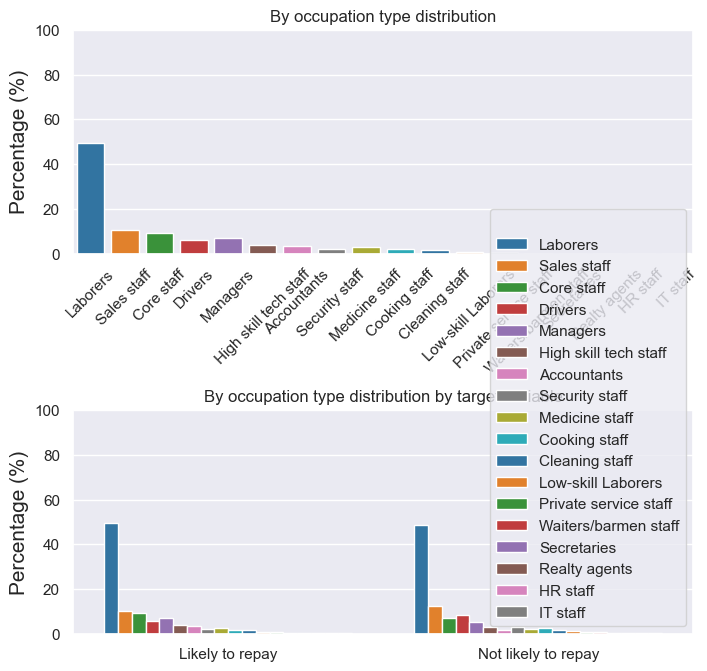

In [753]:
# plot target variable wise distribution
target_wise_data_plot(occupation, column_name, 'occupation_type')

- 'Laborers' applied for most loans and they are dominant class in both defauler and non-defaulter categories

### What Days of the Week seen most Applications?

In [701]:
column_name = 'WEEKDAY_APPR_PROCESS_START'

In [706]:
# dataframe containing percent distribution information
weekday = target_wise_data_dist1(df_cat, column_name)
weekday.sort_values(by=['Percentage'],ascending=False, inplace=True)
weekday.head()

,TARGET,WEEKDAY_APPR_PROCESS_START,Percentage,Percentage_total
12,1,TUESDAY,18.130916,17.528153
5,0,TUESDAY,17.475220,17.528153
13,1,WEDNESDAY,17.071501,16.888502
6,0,WEDNESDAY,16.872431,16.888502
1,0,MONDAY,16.548396,16.491768


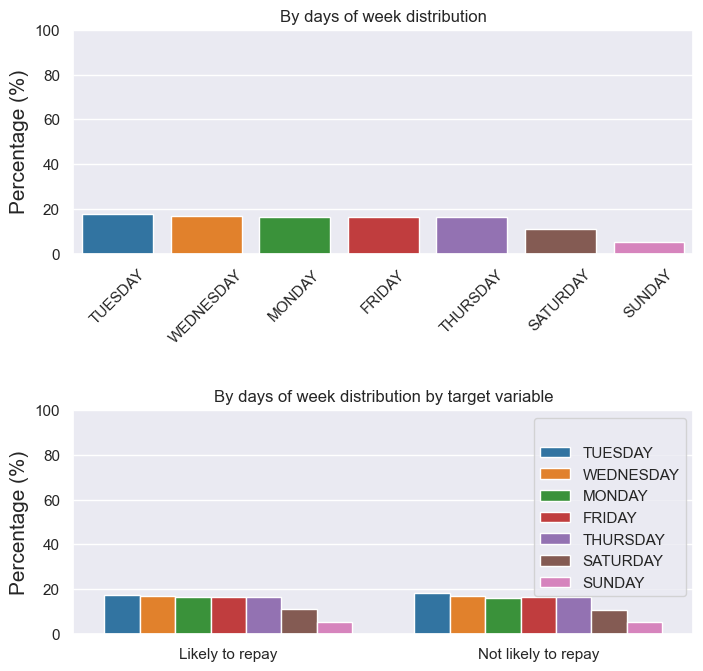

In [707]:
# plot target variable wise distribution
target_wise_data_plot(weekday, column_name, 'days_of_week')

- As expected 'weekend' saw drop in applications, Sunday the lowest
- 'Weekday' has almost eqaual number of applications. Tuesday has maximum numbers by a very small margin

### What Organization the Clients belong to?

In [708]:
column_name = 'ORGANIZATION_TYPE'

In [709]:
# dataframe containing percent distribution information
organization = target_wise_data_dist1(df_cat, column_name)
organization.sort_values(by=['Percentage'],ascending=False, inplace=True)
organization.head()

,TARGET,ORGANIZATION_TYPE,Percentage,Percentage_total
63,1,Business Entity Type 3,25.470292,22.110429
5,0,Business Entity Type 3,21.815371,22.110429
57,0,XNA,18.530808,18.007161
100,1,Self-employed,15.742195,12.491260
42,0,Self-employed,12.205769,12.491260


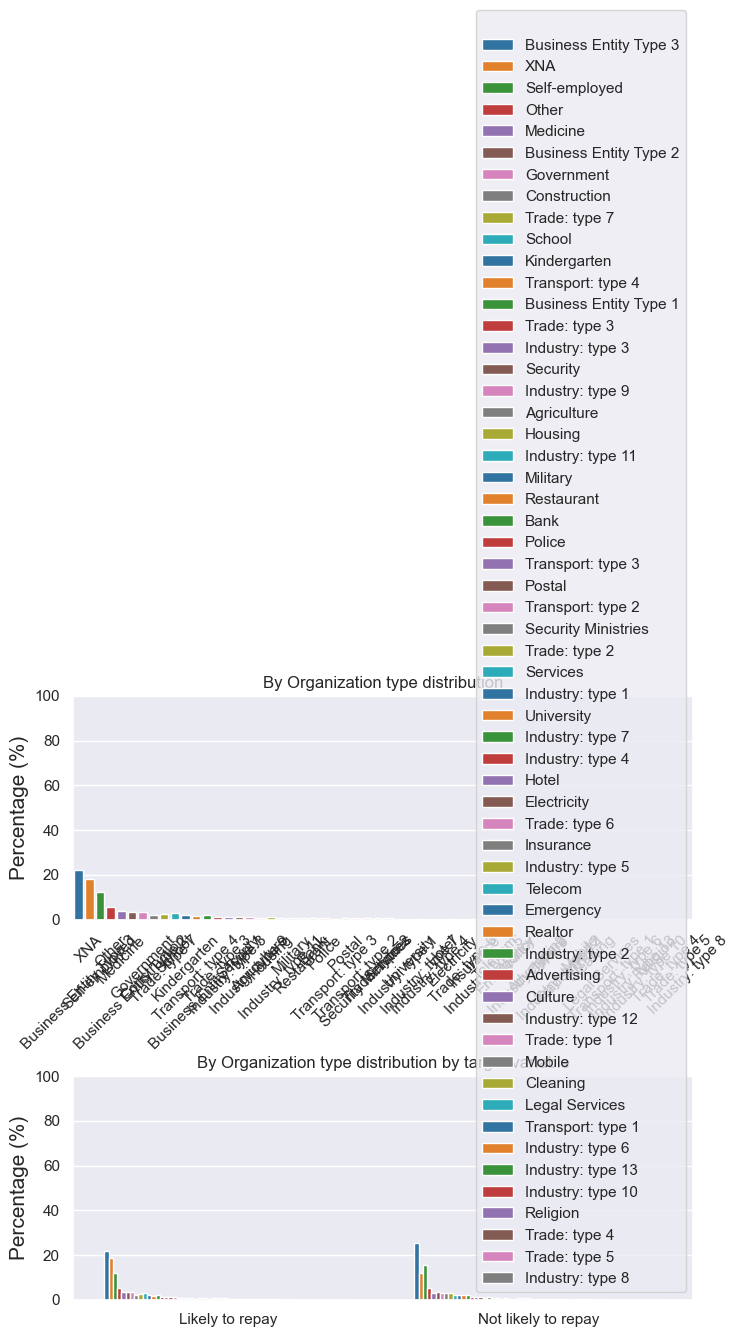

In [710]:
# plot target variable wise distribution
target_wise_data_plot(organization, column_name, 'Organization_type')

- 'Business entity type 3' organization applied for most loans

### House Area Types

In [711]:
column_name ='HOUSETYPE_MODE'

In [712]:
# dataframe containing percent distribution information
housearea_type = target_wise_data_dist1(df_cat, column_name)
housearea_type.sort_values(by=['Percentage'],ascending=False, inplace=True)
housearea_type.head()

,TARGET,HOUSETYPE_MODE,Percentage,Percentage_total
0,0,block of flats,98.262029,98.241039
3,1,block of flats,98.002014,98.241039
4,1,specific housing,1.131923,0.955413
1,0,specific housing,0.939912,0.955413
5,1,terraced house,0.866062,0.803548


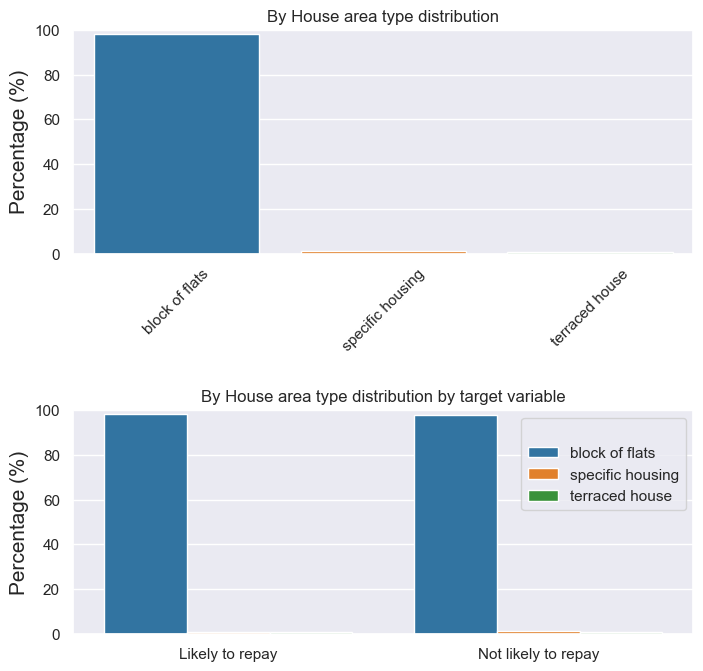

In [713]:
# plot target variable wise distribution
target_wise_data_plot(housearea_type, column_name, 'House_area_type')

- Most applicants belong to 'block of flats' area

### Wall Materials

In [714]:
column_name ='WALLSMATERIAL_MODE'

In [715]:
# dataframe containing percent distribution information
wallmaterials = target_wise_data_dist1(df_cat, column_name)
wallmaterials.sort_values(by=['Percentage'],ascending=False, inplace=True)
wallmaterials.head()

,TARGET,WALLSMATERIAL_MODE,Percentage,Percentage_total
12,1,"Stone, brick",43.883182,42.927570
4,0,Panel,43.770119,43.647544
5,0,"Stone, brick",42.843650,42.927570
11,1,Panel,42.251762,43.647544
0,0,Block,6.078830,6.073929


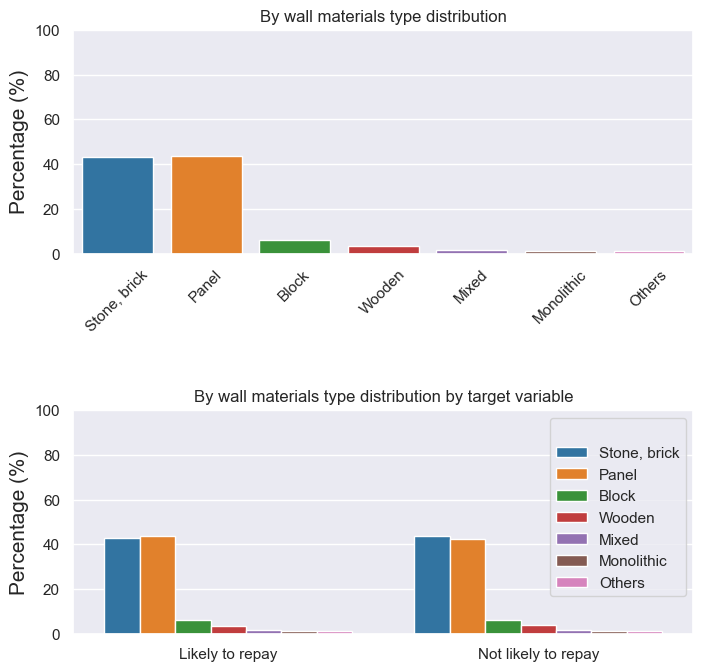

In [716]:
# plot target variable wise distribution
target_wise_data_plot(wallmaterials, column_name, 'wall_materials_type')

- Most applicants lived in 'stone, brick' wall house followed by 'panel' type
- 'non-defaulter' lived mostly in 'panel type' house whereas defaulters mostly lived in 'stone, brick' walled house

## 2.2 Insights into Numerical Variables

In [1209]:
# selecting 'Numerical' datatypes

df_num = df.select_dtypes(exclude=['object'])
df_num.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Any Variability in Loan Repayment over Number of Children?

In [891]:
def kdeplot_distribution(df, column_name, label):
    '''distribution plot of a column_variable w.r.t target and population itself'''
    
    # figure specifications
    fig, axes =plt.subplots(nrows=2, ncols=1, figsize=(8,8), dpi=100)
    plt.subplots_adjust(hspace = 0.3)
    
    # plot overall distribution
    b = sns.kdeplot(df_num[column_name],color='b', ax=axes[0], label='')
    b.set_ylabel('Density'); b.set_title('Distribution of '+label)
    
    # plot distribution by target
    a = sns.kdeplot(df_num[column_name][df_num.TARGET==0], color='r', ax=axes[1], label='Likely to repay')
    a = sns.kdeplot(df_num[column_name][df_num.TARGET==1],color='g', ax=axes[1],label='Not likely to repay')
    a.set_xlabel(label); plt.ylabel('Density')
    
    # save the figure
    plt.savefig('figures/EDA_'+label+'.png')
    
    return

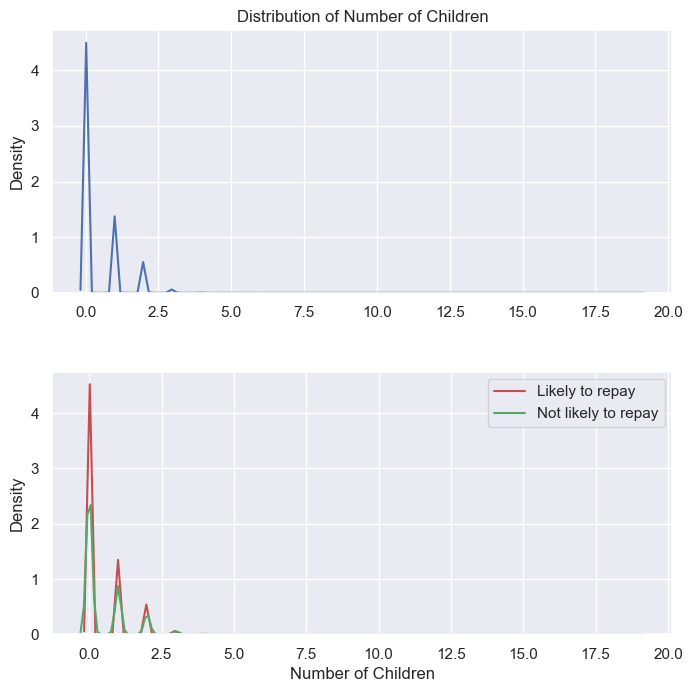

In [892]:
children = kdeplot_distribution(df_num, 'CNT_CHILDREN', 'Number of Children')

- Majority applicants have no children
- Interestingly, the distribution extended till 20, which aparently seems suspicious and will be explored further
- We will explore if the anomolous distribution is similar or very dissimilar with the non-anomolous trend
- Now the challenge is what is the cut off number of children we will be appropriate to pick. In determining, we will pick a range and then find the maximum correlated number with target variable withing the range 

In [ ]:
def anomolous_number(anomolous_range, column_name):
    
    '''function to determine optimum column variable for maximum correlation with target variable'''
    # list to contain correlation result
    corr_res=[]
    
    for anom in anomolous_range:
        anom_rows = df_num[column_name] >= anom
        ch_anom = pd.DataFrame(data = {'anom': np.array(1*anom_rows), 'tar' : df_num['TARGET'].values})
        corr_res.append(ch_anom.corr()['anom']['tar'])
    # dataframe containing 'range' and 'correlation' result and take the maximum crrelated value and corresponding range
    return pd.DataFrame(data = {'range': anomolous_range, 'corr': np.abs(corr_res)}).sort_values(by='corr', ascending=False)['range'][1]
    

In [1210]:
# lets pick a range 5-20 for CNT_CHILDREN column
print('optimum children number for highly correlated anomolous data with target variable is : ', anomolous_number(range(5,20), 'CNT_CHILDREN'))

optimum children number for highly correlated anomolous data with target variable is :  6


In [1211]:
# anomolous numbers
suspicious_ch = 6 # from above
anom_rows_ch =df_num['CNT_CHILDREN'] >= suspicious_ch
children_anom = df_num[anom_rows_ch]
print('Loan defaulter in the anomolous population is: {}%'.format(100*(children_anom['TARGET'][children_anom['TARGET']==1].count()/children_anom['TARGET'].count())))

Loan defaulter in the anomolous population is: 21.428571428571427%


- 'Loan defaulter' percentage with more than 6 children jumped drastically from general figure of 8% 
- We will check if the 'anomolous' and 'non-anomolous' distribution is similar or significantly different using 'hypothesis' testing
- As the data is highly un-symmetric, we will be using t-distribution
- Hypothesis are: 

**H0**: mu1=mu2 (mean of 'target' between anomolous/non-anomolous group are equal)

**H1**:mu1!=mu2 (mean of 'target' between anomolous/non-anomolous group are different)

In [1212]:
# Let's determine anomolous/non-anomolous target variables
children_anom_target = children_anom['TARGET']
children_non_anom_target = df_num['TARGET'][~(anom_rows_ch)]

- target variable is highly imbalanced so, the distribution would not follow symmetrical shape
- t-test will be used, to verify hopothesis set earlier

In [1213]:
# t-test

from scipy.stats import ttest_ind
p,t=ttest_ind(children_anom_target, children_non_anom_target, equal_var=False)
print('p-value: ',p,' t-score:',t)

p-value:  2.084375057364104  t-score: 0.04339621902733879


- So we accept the null hypothesis, that the distributions are similar 
- Although hypothesis testing suggests anomolous and non-anomolous data distribution are similar, we saw big jump in % of loan defaulter when assuming cut off number of children is 6
- We will keep this for future exploration whether adding this as new feature would make any difference by applying in model training

### Variability over Total Income

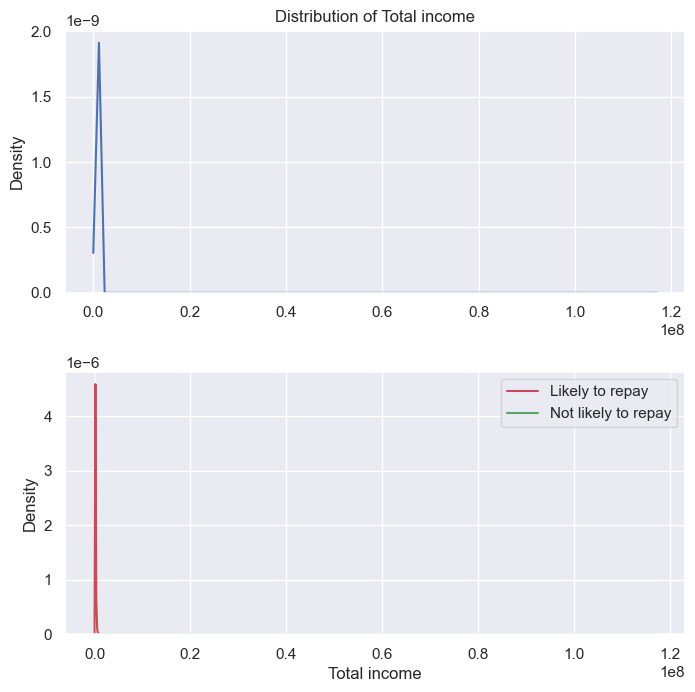

In [861]:
income = kdeplot_distribution(df_num, 'AMT_INCOME_TOTAL', 'Total income')

- Income distribution concentrated at lower end which make sense

### Credit Amount

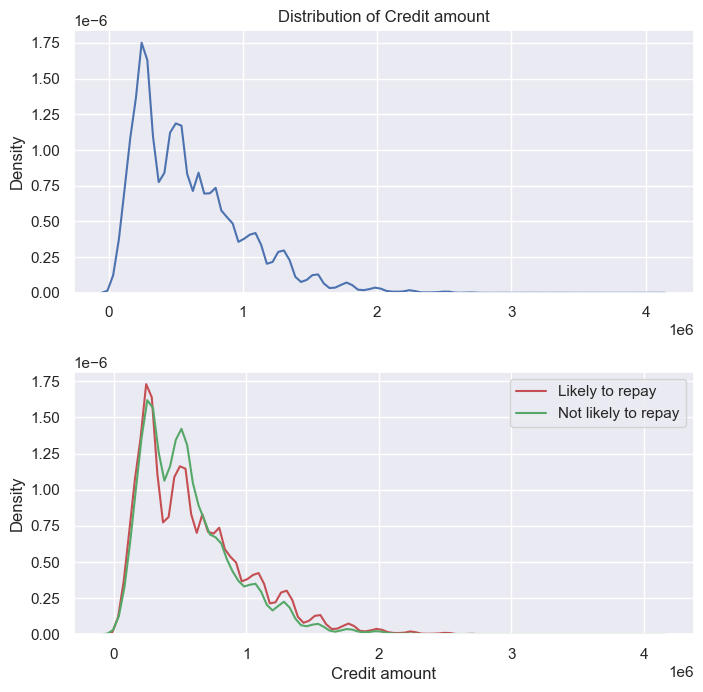

In [862]:
credit = kdeplot_distribution(df_num, 'AMT_CREDIT', 'Credit amount')

- There are certain credit range Home Credit disburses to the clients. Range between 0 to 1 million
- The credit distribution looks normal

### Annuity Amount
Income that the insurance company provides in return of a fixed income.

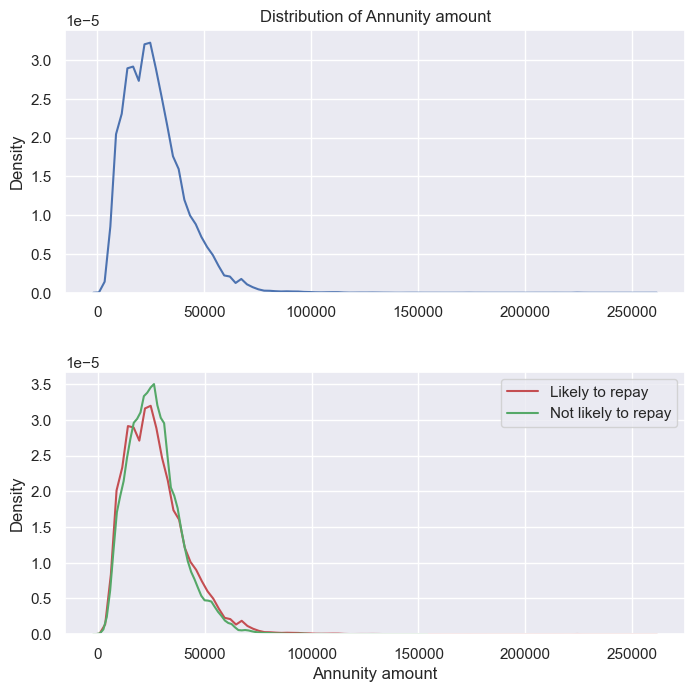

In [864]:
annunity = kdeplot_distribution(df_num, 'AMT_ANNUITY', 'Annunity amount')

- Annuity amount concentrated around 25,000

### Age Distribution
Client's age are given in days. It is convention to display in years. Then age distribution will be explored.

In [1214]:
# convert birth days to years
df_num['YEARS_BIRTH'] = (-df_num.DAYS_BIRTH/365)
df_num.drop(columns=['DAYS_BIRTH'], inplace=True)

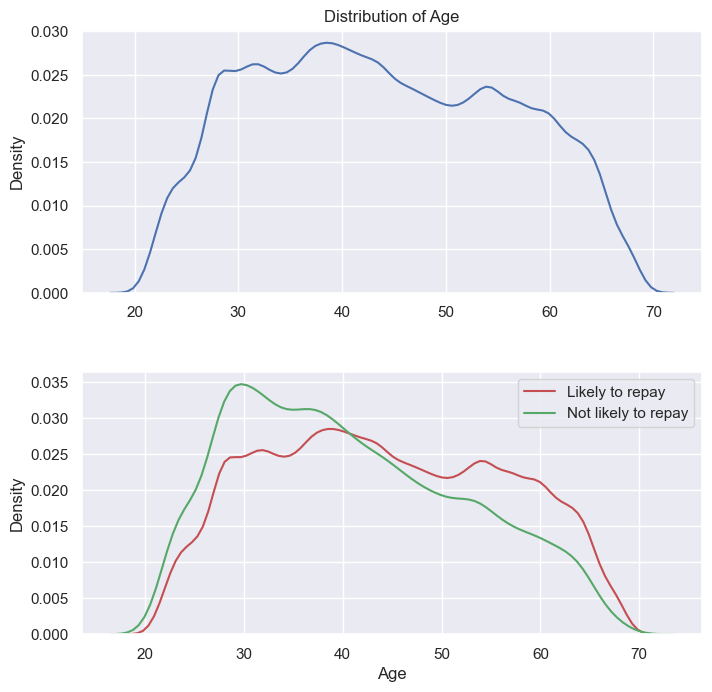

In [874]:
age = kdeplot_distribution(df_num, 'YEARS_BIRTH', 'Age')

- The age data is well distributed over repayments
- Clear distinction between likely to repay/not likely to repay over age. The distribution is skewed to the younger ages. That means, people around 30 years are less likely to repay loans
- Relatively older population (>60) are highly likely to repay loans
- This is expected to be a important feature

### Years Employed
Years are given in days. We will convert in years and explore distribution

In [1215]:
# convert employed days to years
df_num['YEARS_EMPLOYED'] = (df_num.DAYS_EMPLOYED/365)
df_num.drop(columns=['DAYS_EMPLOYED'], inplace=True)

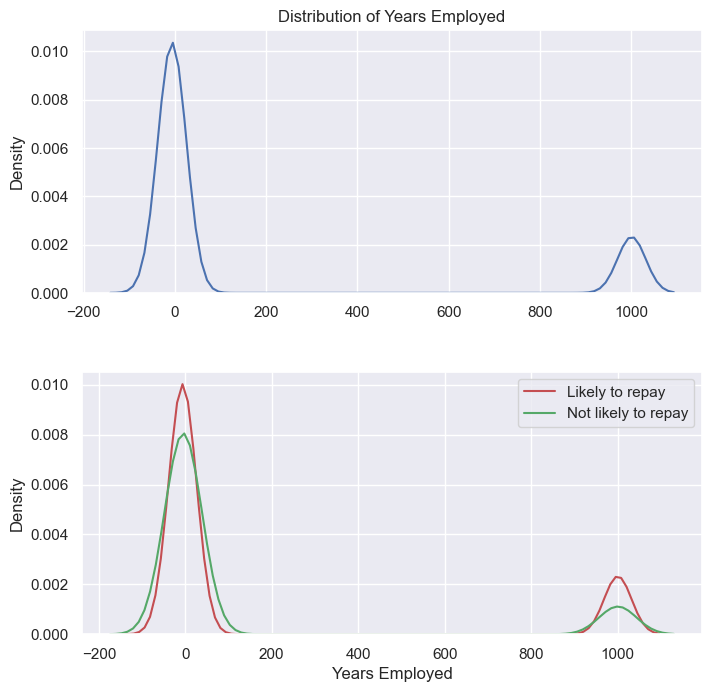

In [884]:
employed = kdeplot_distribution(df_num, 'YEARS_EMPLOYED', 'Years Employed')

- There is a bump around 1000 years, which is unrealistic for number of years employed
- Lets determine optimum cut off years employed number for maximum correlation with target

In [1216]:
# lets pick a range 300-1000 for YEARS_EMPLOYED column
print('optimum years employed for highly correlated anomolous data with target variable is : ', anomolous_number(range(200,1000), 'YEARS_EMPLOYED'))

optimum years employed for highly correlated anomolous data with target variable is :  201


In [1219]:
# anomolous numbers
suspicious_em = 201
anom_rows_employed = df_num['YEARS_EMPLOYED'] >= suspicious_em
employed_anom = df_num[anom_rows_employed]
print('Loan defaulter in the anomolous population is: {}%'.format(100*(employed_anom['TARGET'][employed_anom['TARGET']==1].count()/employed_anom['TARGET'].count())))

Loan defaulter in the anomolous population is: 5.399646043269405%


- This percentage is way lower than the overall percantage (~8%)
- We will mark these numbers as anomolous data
- Replace YEARS_EMPLOYED rows greater than 201 with 0, as majority numbers are around 0 and the true values are hard to guess

In [1220]:
# Replace the anomalous values with 0 and convert negative years into positive
df_num['YEARS_EMPLOYED'][anom_rows_employed] = 0
df_num['YEARS_EMPLOYED']=-df_num['YEARS_EMPLOYED']

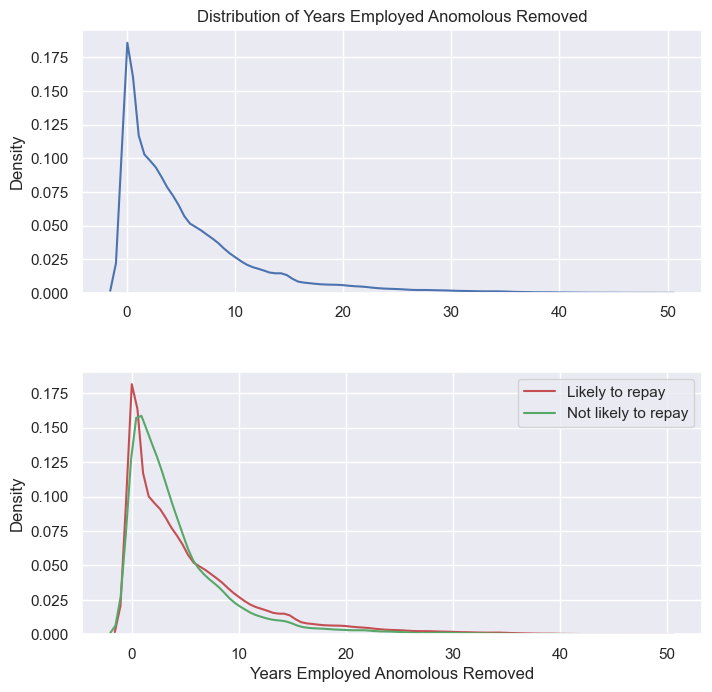

In [909]:
employed_cleaned = kdeplot_distribution(df_num, 'YEARS_EMPLOYED', 'Years Employed Anomolous Removed')

- The distribution looks clean 
- More years of employed population tend to not repaying loans compared to likely to raying

### Years of Registration
Registration are given in days with negative values. Days will be converted to years with positive numbers

In [1221]:
# convert registration days to years
df_num['YEARS_REGISTRATION'] = (-df_num.DAYS_REGISTRATION/365)
df_num.drop(columns=['DAYS_REGISTRATION'], inplace=True)

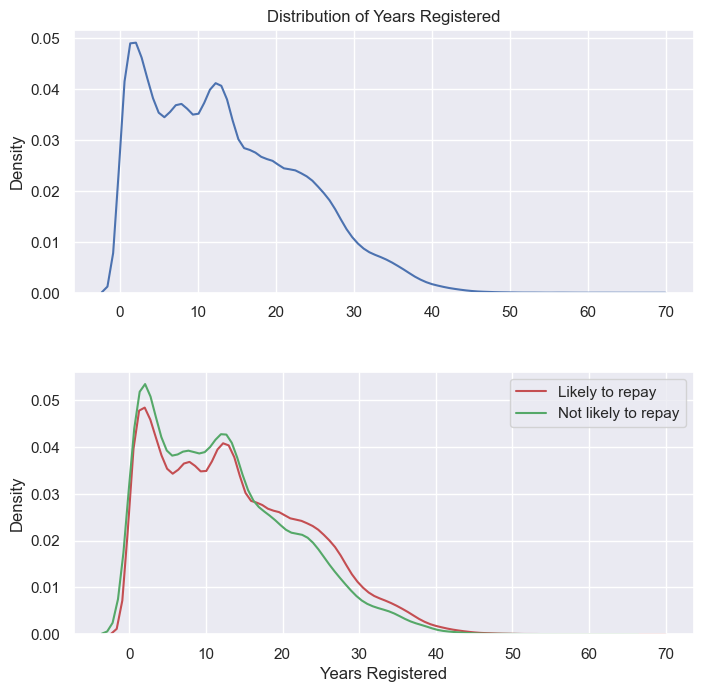

In [913]:
registration = kdeplot_distribution(df_num, 'YEARS_REGISTRATION', 'Years Registered')

- From 0-15 years clients tend not to repay loans, beyond 15 years clients tend to repay loans

### Years since Clients Changed Goverment ID
Days will be converted into years and distribution explored

In [1222]:
# convert registration days to years
df_num['YEARS_ID_PUBLISH'] = (-df_num.DAYS_ID_PUBLISH/365)
df_num.drop(columns=['DAYS_ID_PUBLISH'], inplace=True)

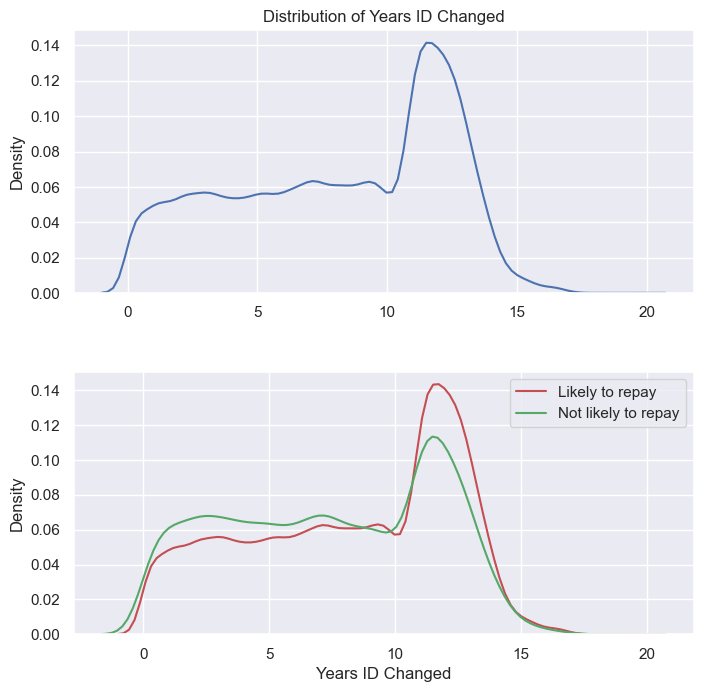

In [916]:
id_publish = kdeplot_distribution(df_num, 'YEARS_ID_PUBLISH', 'Years ID Changed')

- People changed their ID within 11 years tend not to repay their loans than those repaying
- Beyond 11 years of last ID change, more people tend to repay loand than those who dont

### Car Age Distribution

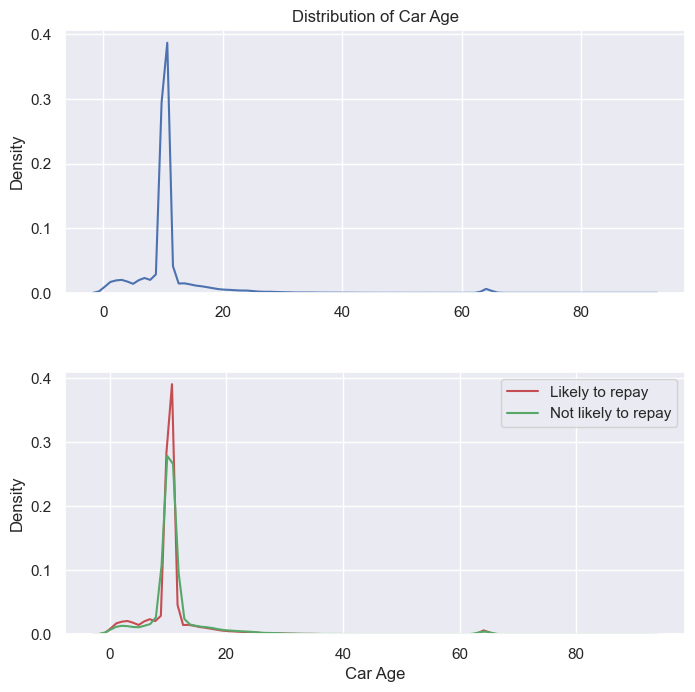

In [918]:
car_Age = kdeplot_distribution(df_num, 'OWN_CAR_AGE', 'Car Age')

- Most car age ranged between 0 to 20 years
- There is a cluster around 65 year which is suspicious. Cars age with more than 65 years is highly unlikely
- Lets determine cut off car age for which maximum correaltion will be found between anomolous data and target

In [1223]:
# lets pick a range 40-65 for OWN_CAR_AGE column
print('optimum car age for highly correlated anomolous data with target variable is : ', anomolous_number(range(40,65), 'OWN_CAR_AGE'))

optimum car age for highly correlated anomolous data with target variable is :  41


In [1224]:
# anomolous numbers
suspicious_car = 41
anom_rows_car = df_num['OWN_CAR_AGE'] >= suspicious_car
car_anom = df_num[anom_rows_car]
print('Loan defaulter in the anomolous population is: {:.2f}%'.format(100*(car_anom['TARGET'][car_anom['TARGET']==1].count()/car_anom['TARGET'].count())))

Loan defaulter in the anomolous population is: 8.39%


- Although anomolous population distribution is closer to the original distribution (~8%), we will pass it on to the t-test to determine if anomolous/non-amolous have different distribution
- Hypothesis are: 

**H0**: mu1=mu2 (mean of 'target' between anomolous/non-anomolous group are equal)

**H1**:mu1!=mu2 (mean of 'target' between anomolous/non-anomolous group are different)

In [1225]:
# Let's determine anomolous/non-anomolous target variables
car_anom_target = car_anom['TARGET']
car_non_anom_target = df_num['TARGET'][~(anom_rows_car)]

In [1226]:
# t-test

from scipy.stats import ttest_ind
p,t=ttest_ind(car_anom_target, car_non_anom_target, equal_var=True)
print('p-value: ',p,' t-score:',t)

p-value:  0.7057140455168853  t-score: 0.48036651915330064


- t-test suggests the amomolous/non-anomolous distribution are similar

### FLAG_ Columns
Multiple columns consisting information of clients mobile, phone and email. All column distribution were checked, they are okay. Only email column will be displayed

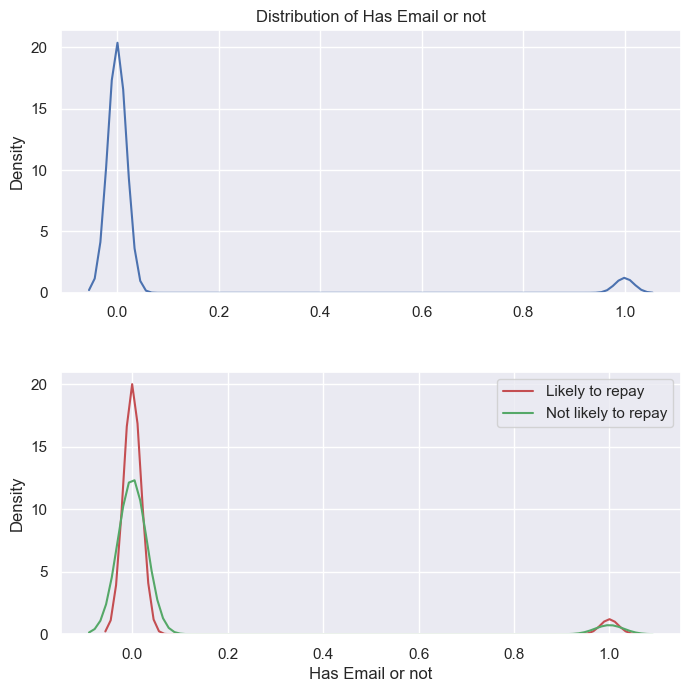

In [928]:
email = kdeplot_distribution(df_num, 'FLAG_EMAIL', 'Has Email or not')

- Surprisingly, majority of the clients did not have emails

### How Many Family Members Clients have?

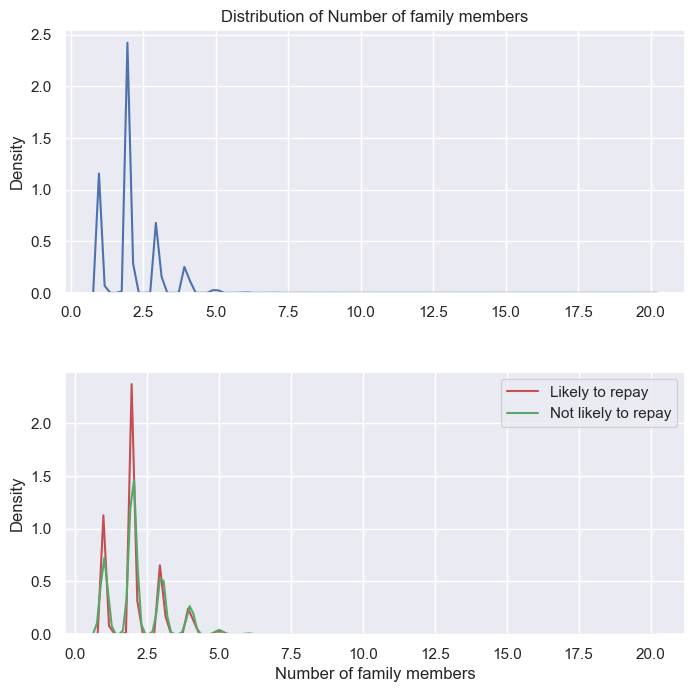

In [929]:
family = kdeplot_distribution(df_num, 'CNT_FAM_MEMBERS', 'Number of family members')

- Note that, 2 family members have the majority class, i.e. couple applied for most loans
- Lets find out cut off family number for maximum correlation between anomolous and target variable

In [1227]:
# lets pick a range 7-20 for CNT_FAM_MEMBERS column
print('optimum family members for highly correlated anomolous data with target variable is : ', anomolous_number(range(7,20), 'CNT_FAM_MEMBERS'))

optimum family members for highly correlated anomolous data with target variable is :  8


In [1228]:
# anomolous numbers
suspicious_fam = 8
anom_rows_fam = df_num['CNT_FAM_MEMBERS'] >= suspicious_fam
fam_anom = df_num[anom_rows_fam]
print('Loan defaulter in the anomolous population is: {:.2f}%'.format(100*(fam_anom['TARGET'][fam_anom['TARGET']==1].count()/fam_anom['TARGET'].count())))

Loan defaulter in the anomolous population is: 22.50%


- Loan defaulter for anomolous family member numbers are very high compared to general ditribution (~8%)
- This make sense, as having high family members have high operating cost and less likely to return any loans
- Extra attention will be paid for the anomolous numbers

### Does the Application Placing Time Makes any Difference?

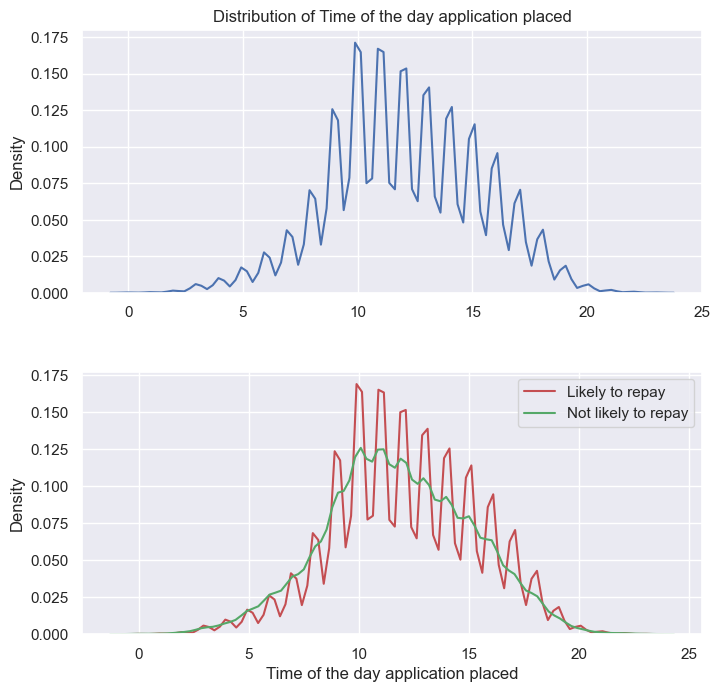

In [934]:
app_time = kdeplot_distribution(df_num, 'HOUR_APPR_PROCESS_START', 'Time of the day application placed')

- Majority applications are placed around 10-11 AM in the morning

### EXT_SOURCE Columns
There are 3 EXT_SOURCE columns. Description does not mention exactly what they are, only ssys normalized score from external sources

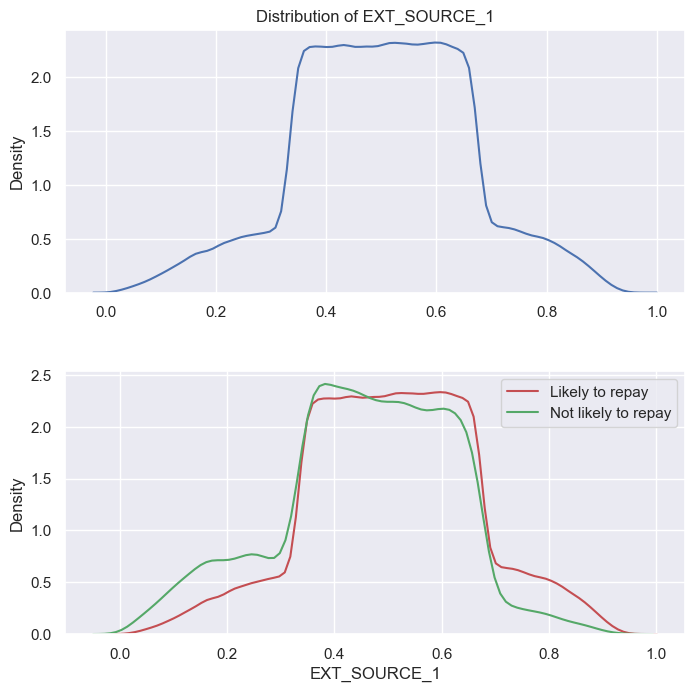

In [937]:
ext_1 = kdeplot_distribution(df_num, 'EXT_SOURCE_1', 'EXT_SOURCE_1')

- The distribution for defaulter vs non-defaulter are different. This is expected to be a important feature

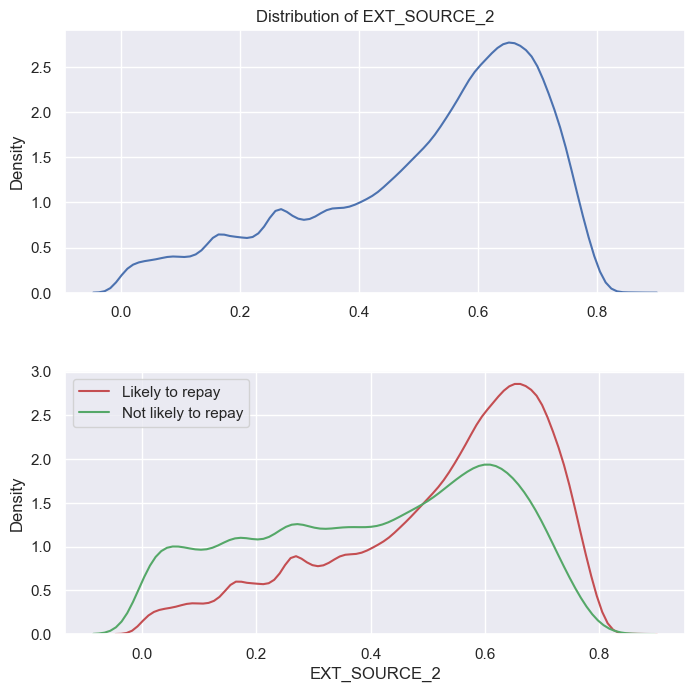

In [938]:
ext_2 = kdeplot_distribution(df_num, 'EXT_SOURCE_2', 'EXT_SOURCE_2')

- this distribution is also very distinctiove and expected to be important for modelling

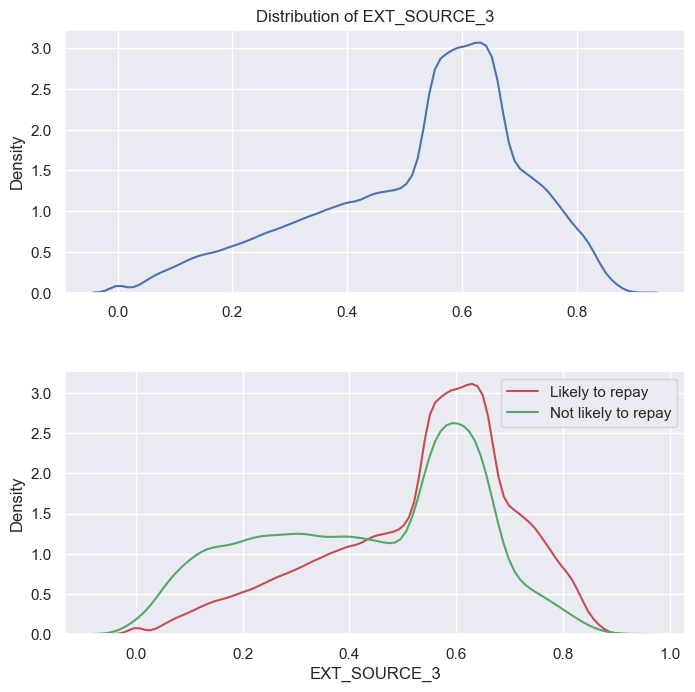

In [939]:
ext_3= kdeplot_distribution(df_num, 'EXT_SOURCE_3', 'EXT_SOURCE_3')

- The defaulter vs non-defaulter distribution are distinctive and deemed to be a important feature for modelling

### Does Last Phone Change Years Distribution

In [1229]:
# convert last phone change days to years
df_num['YEARS_LAST_PHONE'] = (df_num.DAYS_LAST_PHONE_CHANGE/365)
df_num.drop(columns=['DAYS_LAST_PHONE_CHANGE'], inplace=True)

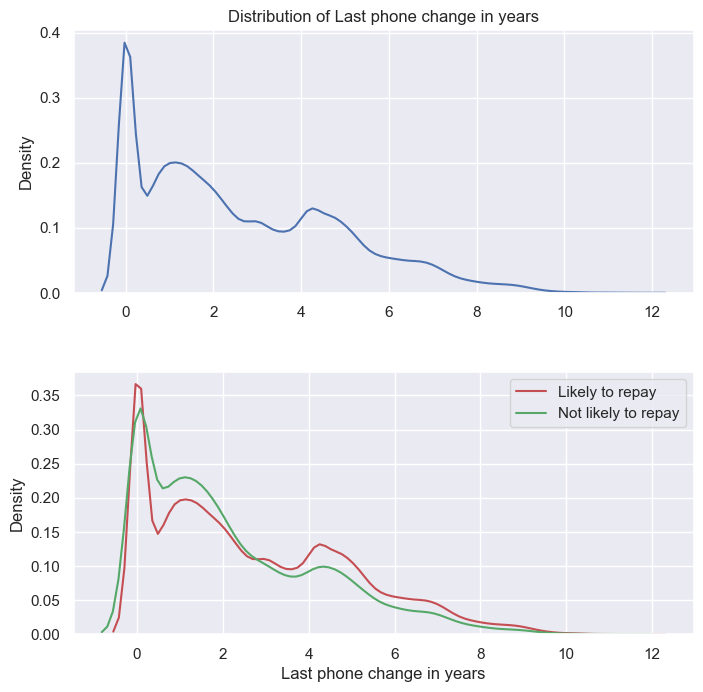

In [958]:
phone_ch= kdeplot_distribution(df_num, 'YEARS_LAST_PHONE', 'Last phone change in years')

- Applicants changed phones between 0 to 8 years

### Other Columns
Other columns were checked for possibe anomalies and found okay. 

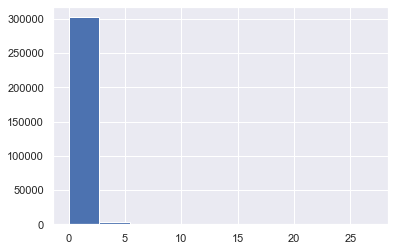

In [973]:
df_num.AMT_REQ_CREDIT_BUREAU_MON.hist()

## 2.3 Anomalies and Outliers
Lets have an initial look into the data distribution by boxplot if any outliers are spotted. There are 78 columns which will be computationally heavy. We will be picking 25 columns and boxplot. This will give first indication if there is any outliers.

<Figure size 432x288 with 0 Axes>

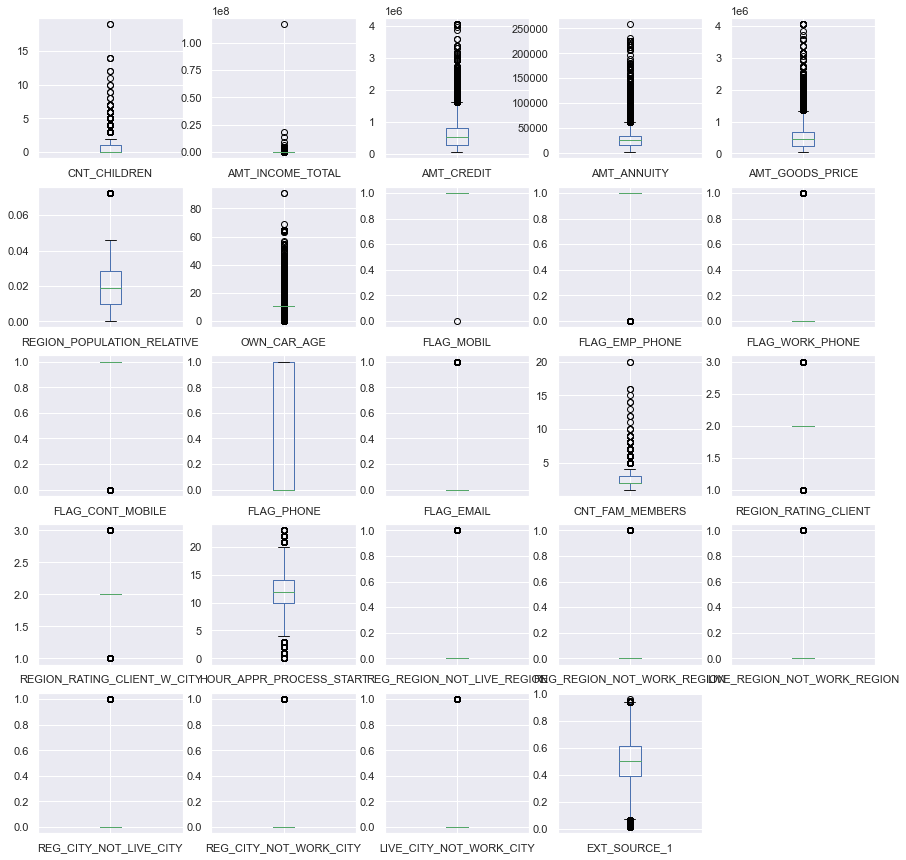

In [999]:
# boxplot 25 columns of the dataframe

plt.figure()
df_num.iloc[:,2:26].plot.box(subplots = True,layout=(5,5), figsize=(15,15))
plt.savefig("figures/EDA_boxplot.png")

plt.show()


- Many columns aparently falls outside of interquantile range (IQR) in the boxplots
- Next we will quantify if this is the case and how much

In [1000]:
# inter quartile range (IQR)

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

In [1001]:
outlier_rows = ~(df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))

In [1002]:
# Numerical data after removing outliers
df_outliers = df_num[outlier_rows.any(axis = 1)]

In [1003]:
# Calculate % of anomolous data

import operator
removed_obs = tuple(map(operator.sub, df_num.shape, test.shape))
removed_obs
print('Anomalous data calculated (%):',100-(test.shape[0]/df_num.shape[0])*100)

Anomalous data calculated (%): 0.0


Many data ditributions do not follow known statistical distribution, skewed on left or right end. No anomolous data was found. 

## 2.4 Explore Data Relationship
Many column variables could be similar in patterns, which is redundant for modelling purpose. Based on high degree of similarities, variables will be removed for cleaner dataset.

### Correlation Heatmap
Based on Pearson's correlation coefficient, the variables will be grouped into high, moderate and low similarities
- **High Degree** : >0.5 with maximum of 1.0
- **Moderate Degree** : 0.3-0.49
- **Low Degree** : <0.29

#### Highly Correlated Variables

In [1232]:
# remove 'client ID' column
df_num.drop(columns=['SK_ID_CURR'], inplace=True)

In [1080]:
#correlation matrix 

corrmat = abs(df_num.corr())

In [1094]:
def correlated_variables(df, upper_range, lower_range, label):
    '''function to find out and plot top correlated variables within range'''
    # take top 15 variables
    temp1 = df.unstack()
    temp2 = temp1[(temp1<upper_range) & (temp1>lower_range)].sort_values(ascending=False).drop_duplicates().unstack()
    
    f, ax = plt.subplots(figsize=(12, 9))
    hm = sns.heatmap(round(temp2.iloc[0:15,0:15],2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
    f.subplots_adjust(top=0.93)
    t= f.suptitle('Home Credit Group '+ label+'ly correlated variables', fontsize=14)
    plt.savefig('figures/EDA_'+label+'correlation.png')
    plt.show()
    
    return temp2

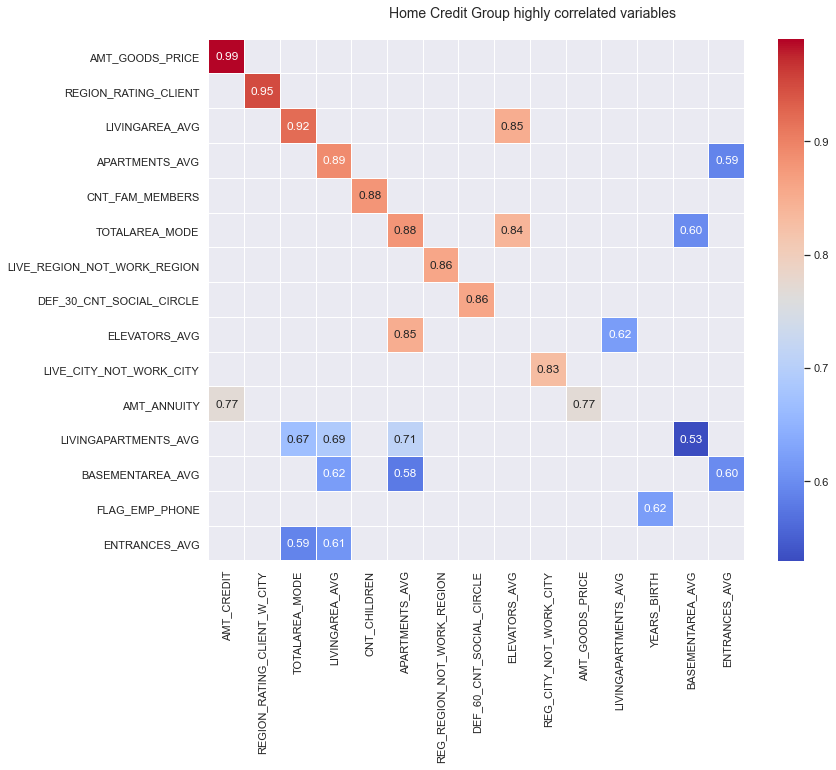

In [1100]:
# Highly correlated variables
# omitted correlation coefficient of 1.0 to exclude self correlated variables 
high_correlated = correlated_variables(corrmat, .99, .5, 'high')

Top highly correlated variables found to be:
- AMT_GOODS_PRICE----AMT_CREDIT (0.99). It is the price of the good for which credit is given, they are highly correlated
- REGION_RATING_CLIENT----REGION_RATING_CLIENT_W_CITY (0.95)
- LIVING_AREA----TOTALAREA_AVG (0.92). Bigger the total area, larger the living area would be

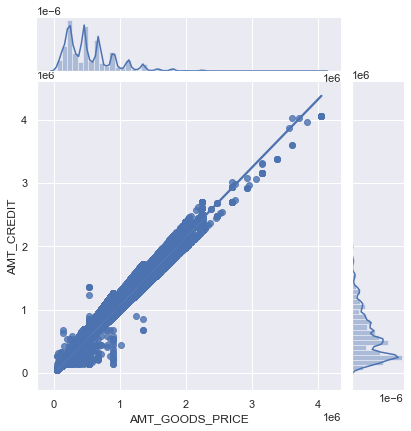

In [1096]:
# Lets visualize AMT_GOODS_PRICE----AMT_CREDIT--jointplot
sns.jointplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=df_num, kind="reg");
plt.savefig("figures/EDA_GOODS_CREDIT.png")
plt.show()

- Distribution between the variables are highly similar 

#### Moderately Correlated Variables

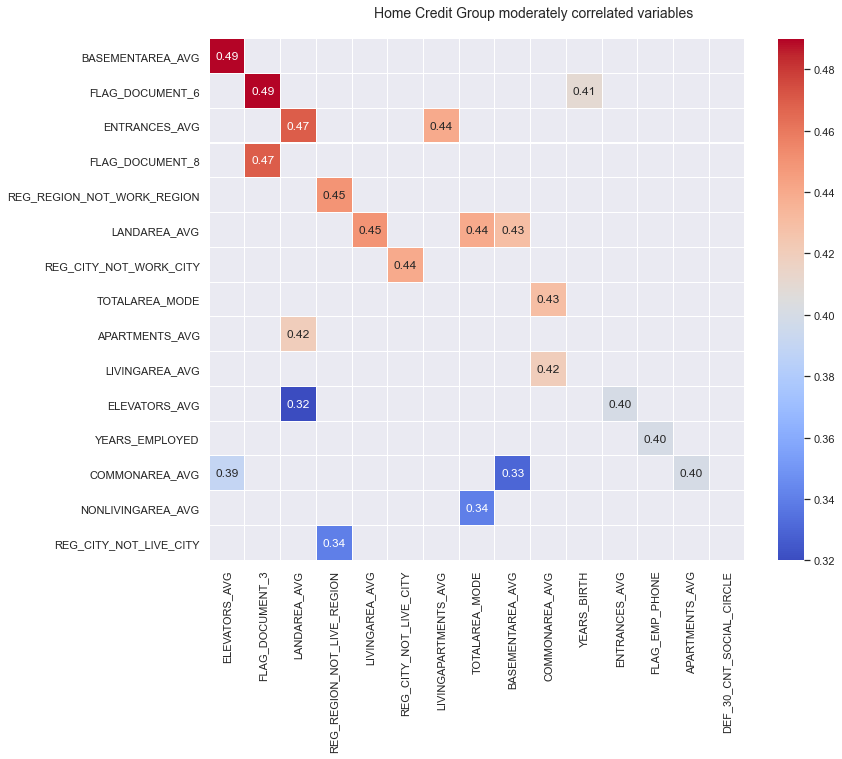

In [1099]:
# Moderately correlated variables
moderate_correlated = correlated_variables(corrmat, .49, .3, 'moderate')

Top moderately correlated variables found to be:
- BASEMENTAREA_AVG----ELEVATORS_AVG (0.49). Basement area and elevators are correlated
- FLAG_DOCUMENT_6----FLAG_DOCUMENT_3 (0.49)
- ENTRANCES_AVG----LANDAREA_AVG (0.47)

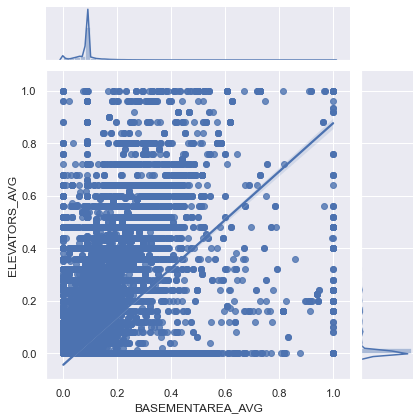

In [1098]:
# Lets visualize BASEMENTAREA_AVG----ELEVATORS_AVG--jointplot
sns.jointplot(x='BASEMENTAREA_AVG', y='ELEVATORS_AVG', data=df_num, kind="reg");
plt.savefig("figures/EDA_BASEMENT_ELEVATOR.png")
plt.show()

- The distribution looks sparse but shape are similar

#### Lowly Correlated Variables

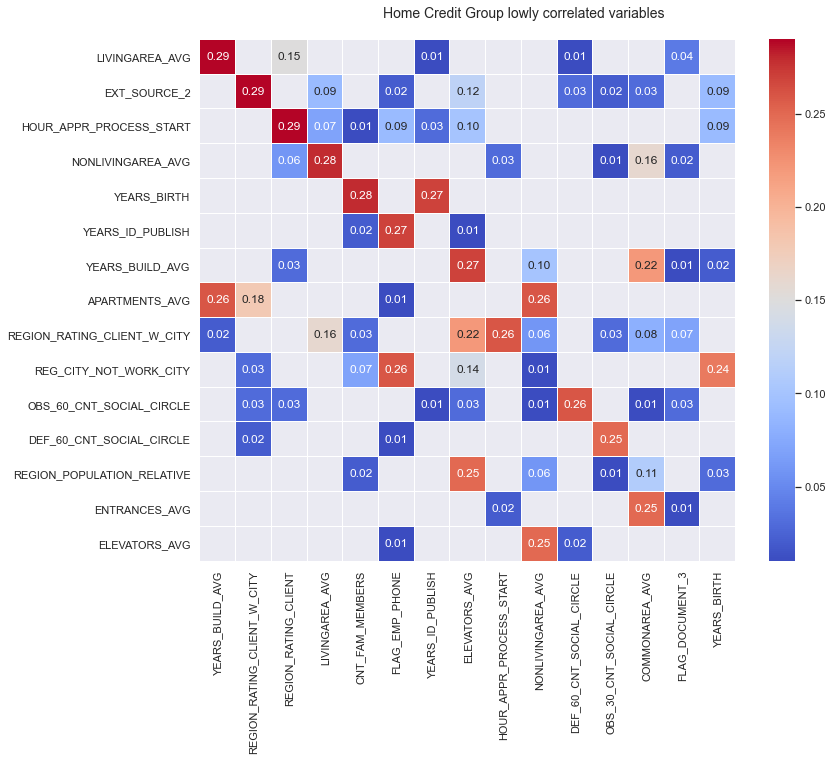

In [1101]:
# Lowly correlated variables
low_correlated = correlated_variables(corrmat, .29, .01, 'low')

Top lowly correlated variables found to be:

- LIVINGAREA_AVG----YEARS_BUILD_AVG (0.29)
- EXT_SOURCE_2----REGION_RATING_CLIENT_W_CITY (0.29)
- HOUR_APPR_PROCESS_START----REGION_RATING_CLIENT (0.29)

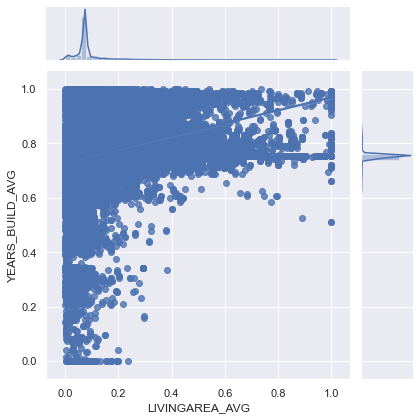

In [1102]:
# Lets visualize LIVINGAREA_AVG----YEARS_BUILD_AVG--jointplot
sns.jointplot(x='LIVINGAREA_AVG', y='YEARS_BUILD_AVG', data=df_num, kind="reg");
plt.savefig("figures/EDA_LIVING_BUILDYEARS.png")
plt.show()

- The distribution is very disperse and lowly correlated

### Drop Highly Correlated Variables
Highly correaled variables add very little information in the modelling and hence considered redundant. In this section, highly correlated variables (correlation coefficient >0.8) will be dropped.

In [1104]:
# List of highly correlated variables with Pearson coefficient >0.8
high_correlated[high_correlated>=.8].stack()

AMT_GOODS_PRICE              AMT_CREDIT                     0.986588
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950842
LIVINGAREA_AVG               TOTALAREA_MODE                 0.916656
                             ELEVATORS_AVG                  0.848549
APARTMENTS_AVG               LIVINGAREA_AVG                 0.887545
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.879160
TOTALAREA_MODE               APARTMENTS_AVG                 0.877071
                             ELEVATORS_AVG                  0.837651
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860627
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.860556
ELEVATORS_AVG                APARTMENTS_AVG                 0.847542
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.825575
dtype: float64

In [1230]:
# take highly correalted variables from the above list one from each pairs, not repeating
high_correlated_variables_to_drop = ['AMT_GOODS_PRICE', 'REGION_RATING_CLIENT_W_CITY', 'TOTALAREA_MODE','ELEVATORS_AVG','LIVINGAREA_AVG','CNT_FAM_MEMBERS','LIVE_REGION_NOT_WORK_REGION','DEF_60_CNT_SOCIAL_CIRCLE','REG_CITY_NOT_WORK_CITY']
df_num.drop(columns=high_correlated_variables_to_drop, inplace=True)

## 2.4 Feature Creation
Feature engineering refers to adding additional features to the existing features to increase information content in the training data. It is very crucial to implement a meaningful machine learning modelling. Feature engineeing could be categorized into two types. 
- Automatic feature selection (featuretools library comes handy for this)
- Manual feature engineering (i.e. anomolous features, observations)
For this work, we will stick to manual feature engineering which will be developed from anomolous features and observations.


### Manual Features
Manual features will be added from anomolous features and observations. Earlier, we identified anomolous features which can add extra information to the dataset. In addition, we can create new features from combinations of other features which will be called features from observation.

#### Anomolous Features
The anomolous columns identified earlier indicate that, the anomolous/non-anomolous data can be used as extra information while training the model. In this section, we will create features based on the anomolous data. Anomolous rows will be indicated by 1 whereas non-anomolous by 0.

In [1233]:
# create a new numerical dataframe which will be added for new features
df_num_feature =df_num.copy()
df_num_feature.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE
0,1,0,202500.0,406597.5,24700.5,0.018801,10.329309,1,1,0,...,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,9.994521,5.808219,3.106849
1,0,0,270000.0,1293502.5,35698.5,0.003541,10.329309,1,1,0,...,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,2.268493
2,0,0,67500.0,135000.0,6750.0,0.010032,26.000000,1,1,1,...,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,11.671233,6.934247,2.232877
3,0,0,135000.0,312682.5,29686.5,0.008019,10.329309,1,1,0,...,0.0,0.0,0.0,0.0,1.0,52.068493,8.326027,26.939726,6.676712,1.690411
4,0,0,121500.0,513000.0,21865.5,0.028663,10.329309,1,1,0,...,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,11.810959,9.473973,3.030137


Add 'anomolous' feature columns

In [1234]:
## CNT_CHILDREN
df_num_feature['CNT_CHILDREN_ANOM']=anom_rows_ch*1

In [1235]:
## YEARS_EMPLOYED
df_num_feature['YEARS_EMPLOYED_ANOM']=anom_rows_employed*1

In [1236]:
## OWN_CAR_AGE
df_num_feature['OWN_CAR_AGE']=anom_rows_car*1

In [1237]:
## CNT_FAM_MEMBERS
df_num_feature['CNT_FAM_MEMBERS'] =anom_rows_fam*1

### Observed Features
From intuition, we can form some features which might be inflential on determining if the client will be rapying loans or not. We will watch individual numerical features if meaningful new features could be formed. There are many boolean features which are not useful for forming any new features. We will exclude boolean features and have a look on the columns individually.   

In [1249]:
# take boolean columns
bool_cols = [col for col in df 
             if np.isin(df[col].dropna().unique(), [0, 1]).all()]
# numerical columns without boolean variables
print('numerical columns without boolean variables:',df_num.columns.difference(bool_cols))

numerical columns without boolean variables: Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'CNT_CHILDREN', 'COMMONAREA_AVG',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'ENTRANCES_AVG', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'HOUR_APPR_PROCESS_START', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OWN_CAR_AGE',
       'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BIRTH', 'YEARS_BUILD_AVG',
       'YEARS_EMPLOYED', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE',
       'YEARS_REGISTRATION'],
      dtype='object')


Observations:
- Percentage of annuity over total income, could be a measure of ability to repay the loan. 
- Amount of credit taken over total income could be another measure. Because income shortage could lead to taking credit
- How much annuity money payment clients made over credit amount. Again, annuity is a form of payment and can lead people toward taking credit
- How many years employed compared to their age. The ratio between these two may tell peoples ability to repay loans. Higher the number better is expected repaying loans
- Apartment area over the income amount. If the house is bigger compared to income level, people may turn to taking credit more
- Car age in peoples life span. Longer people keep their cars, high chance to make monthly installment and turn to credit
- House age in peoples life span. Longer the house people keep, high chance to make monthly installment and turn to credit
We will make new features based on the observations


In [1250]:
# creating additional features

df_num_feature['ANNUNITY_OVER_INCOME'] = df_num_feature['AMT_ANNUITY']/df_num_feature['AMT_INCOME_TOTAL']

In [1251]:
df_num_feature['CREDIT_OVER_INCOME'] = df_num_feature['AMT_CREDIT']/df_num_feature['AMT_INCOME_TOTAL']

In [1252]:
df_num_feature['ANNUNITY_OVER_CREDIT'] = df_num_feature['AMT_ANNUITY']/df_num_feature['AMT_CREDIT']

In [1253]:
df_num_feature['EMPLOYED_OVER_AGE'] = df_num_feature['YEARS_EMPLOYED']/df_num_feature['YEARS_BIRTH']

In [1256]:
df_num_feature['APARTMENT_OVER_INCOME'] = df_num_feature['APARTMENTS_AVG']/df_num_feature['AMT_INCOME_TOTAL']

In [1257]:
df_num_feature['CARAGE_OVER_AGE'] = df_num_feature['OWN_CAR_AGE']/df_num_feature['YEARS_BIRTH']

In [1269]:
df_num_feature['BUILD_OVER_AGE'] = df_num_feature['YEARS_BUILD_AVG']/df_num_feature['YEARS_BIRTH']

Lets see how much correlated the new features are with target variable

In [1276]:
# print out correlation numbers for new features with target variable
observed_features = ['ANNUNITY_OVER_INCOME','CREDIT_OVER_INCOME','ANNUNITY_OVER_CREDIT','EMPLOYED_OVER_AGE','APARTMENT_OVER_INCOME','CARAGE_OVER_AGE','BUILD_OVER_AGE','TARGET']
print('Correlation coefficient for new features with target: ',df_num_feature[observed_features].corr()['TARGET'].sort_values(ascending=False)[1:])

Correlation coefficient for new features with target:  BUILD_OVER_AGE           0.070009
ANNUNITY_OVER_INCOME     0.014267
ANNUNITY_OVER_CREDIT     0.012695
CARAGE_OVER_AGE          0.003170
CREDIT_OVER_INCOME      -0.007727
APARTMENT_OVER_INCOME   -0.021315
EMPLOYED_OVER_AGE       -0.036342
Name: TARGET, dtype: float64


- Newly created features show good degree of correlation with the target variable

#### Top Correlated Features for Target Variable
Highly correlated features with target variable will be sorted out. They will be used for additional feature genration, as they can drive up the target variable. Top three features will be taken. 

In [1124]:
# print top 3 correlated features with target variable
print('Top correlated features with target variables are: ', corrmat.unstack()['TARGET'].sort_values(ascending=False)[1:4])

Top correlated features with target variables are:  EXT_SOURCE_2    0.160259
EXT_SOURCE_3    0.148902
EXT_SOURCE_1    0.088523
dtype: float64


- Top 3 correlated features are EXT_SOURCE_3, 2 and 1
- We tried division and multiplication between these variables and found that multiplication produce distinctive distribution for the target variable

In [1280]:
# new features
df_num_feature['EXT_3_2'] = df_num['EXT_SOURCE_3']*df_num['EXT_SOURCE_2']

In [1284]:
df_num_feature['EXT_3_1'] = df_num['EXT_SOURCE_3']*df_num['EXT_SOURCE_1']

In [1285]:
df_num_feature['EXT_2_1'] = df_num['EXT_SOURCE_2']*df_num['EXT_SOURCE_1']

Lets see how the distributions look like for the new features

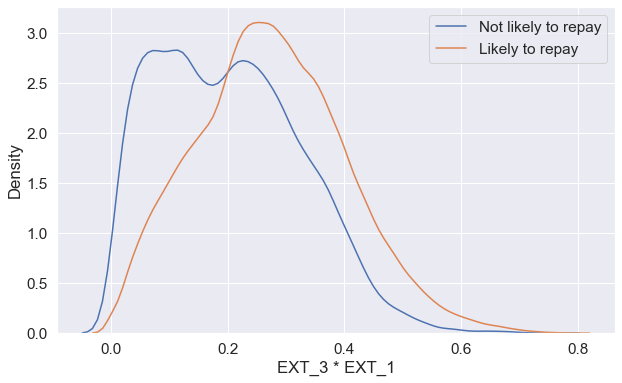

In [1311]:
# plot KDE distribution of EXT_3*EXT_1
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(10,6))
a = sns.kdeplot(df_num_feature['EXT_3_1'][df_num_feature['TARGET']==1], label='Not likely to repay')
a = sns.kdeplot(df_num_feature['EXT_3_1'][df_num_feature['TARGET']==0],label='Likely to repay')
a.set_xlabel('EXT_3 * EXT_1'); plt.ylabel('Density')

# save the figure
plt.savefig('figures/EDA_ext3_1.png')

- The distribution for EXT_3*EXT_1 is distinct for loan defaulter/non-defaulter which is expected to be a better predictor for target variable

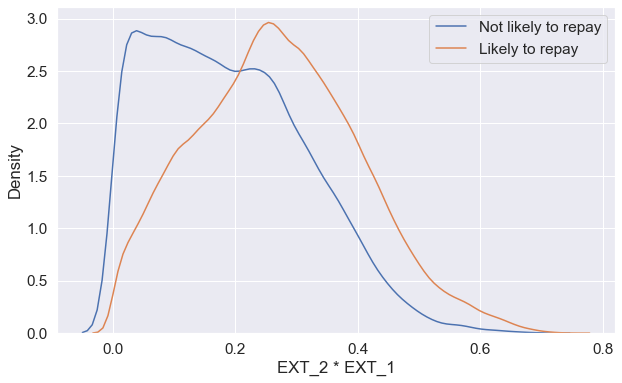

In [1309]:
# plot KDE distribution of EXT_2*EXT_1
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(10,6))
a = sns.kdeplot(df_num_feature['EXT_2_1'][df_num_feature['TARGET']==1], label='Not likely to repay')
a = sns.kdeplot(df_num_feature['EXT_2_1'][df_num_feature['TARGET']==0],label='Likely to repay')
a.set_xlabel('EXT_2 * EXT_1'); plt.ylabel('Density')

# save the figure
plt.savefig('figures/EDA_ext2_1.png')

- The distribution for EXT_2*EXT_1 is distinct for loan defaulter/non-defaulter which is expected to be a better predictor for target variable

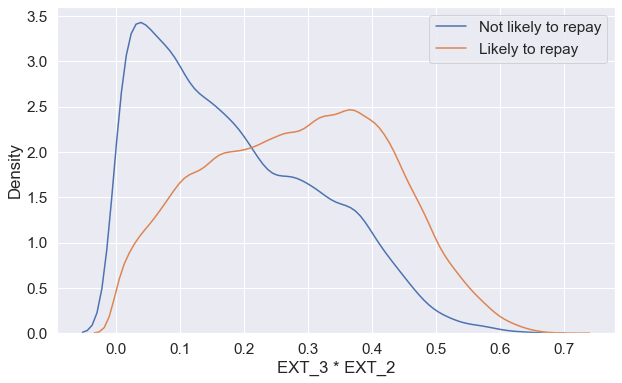

In [1310]:
# plot KDE distribution of EXT_3*EXT_2
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(10,6))
a = sns.kdeplot(df_num_feature['EXT_3_2'][df_num_feature['TARGET']==1], label='Not likely to repay')
a = sns.kdeplot(df_num_feature['EXT_3_2'][df_num_feature['TARGET']==0],label='Likely to repay')
a.set_xlabel('EXT_3 * EXT_2'); plt.ylabel('Density')

# save the figure
plt.savefig('figures/EDA_ext3_2.png')

- The distribution for EXT_3*EXT_2 is distinct for loan defaulter/non-defaulter which is expected to be a better predictor for target variable

### Save Dataframe 
Save dataframe with/without new features for the pre-processing and modelling step

In [1322]:
# Baseline features
df_baseline = pd.concat([df_cat, df_num], axis=1)
df_baseline.to_csv('data/homecredit_baseline_EDA.csv')

In [1323]:
# Extended features
df_extended = pd.concat([df_cat, df_num_feature], axis=1)
df_extended.to_csv('data/homecredit_extended_EDA.csv')